In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import os
from supervised.automl import AutoML
import category_encoders as ce
import math

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from category_encoders import TargetEncoder
from sklearn.metrics import median_absolute_error
print('Imported sci-kit learn and automl libraries!')

Imported sci-kit learn and automl libraries!


## More Economic Variables
Now I am trying to implement more economic variables into my data. I have now adjusted the prices of houses according to estimate inflation figures based on the RPPI in Ireland from 2010-2021. We will see does this improve our model any further.

In [2]:
irl = pd.read_csv('less-columns-eircodes.csv', index_col='Unnamed: 0')
# consumer-interest.csv
# deficit-merged.csv
# inflated-prices.csv

# inflated-prices-1.csv

In [3]:
irl

,Address,County,Price (€),Not Full Market Price,VAT Exclusive,Property Size Description,Year,Month,Town,Region,Neighbourhood,PriceInflation,Eircode
0,"Ballinturley, Four Mile House, Roscommon",Roscommon,46560.0,0,1,1,2014,1,Roscommon Town,West,Four Mile House Roscommon,84489.37,F42
1,"2 Hyde Court, Golf Links Rd, Roscommon",Roscommon,157000.0,1,1,1,2014,1,Roscommon Town,West,Golf Links Road Roscommon,284897.56,F42
2,"32 Convent Court, Convent Rd, Roscommon",Roscommon,56000.0,1,1,0,2014,1,Roscommon Town,West,Convent Road Roscommon,101619.51,F42
3,"35 Abbeyville, Galway Rd, Roscommon",Roscommon,125000.0,1,1,0,2014,1,Roscommon Town,West,Galway Road Roscommon,226829.27,F42
4,"3 The Orchard, The Walk, Roscommon",Roscommon,106000.0,1,1,1,2014,1,Roscommon Town,West,The Walk Roscommon,192351.22,F42
...,...,...,...,...,...,...,...,...,...,...,...,...,...
252466,"6 Leopardstown Oaks, Leopardstown, Blackrock",Dublin,782500.0,1,1,2,2021,3,Blackrock Dublin,Dublin,Leopardstown Blackrock Dublin,841908.89,A94
252467,"94 Carrig Court, Citywest, Saggart",Dublin,276000.0,1,1,2,2021,3,Saggart,Dublin,Cityw Street Saggart,296954.45,D24
252468,"Knightstown, Ballyboughal, Dublin",Dublin,540000.0,1,1,2,2021,3,Ballyboughal,Dublin,Knightstown Ballyboughal,580997.83,A41
252469,"87A Albert Rd Lower, Sandycove, Dublin",Dublin,900000.0,1,1,2,2021,1,Sandycove,Dublin,Albert Road Lower Sandycove,968329.72,A96


In [4]:
#irl.drop(columns=['Address', 'Postal Code', 'VAT Exclusive', 'Description of Property', 'Property Size Description',
#                 'Month', 'Apartment', 'Estate', 'Quarter'], inplace = True)
# rm rppi price (€)

### for inflated-prices-1.csv rm below
#irl.drop(columns=['Address', 'Postal Code', 'VAT Exclusive', 'Description of Property', 'Property Size Description',
#                 'Month', 'Apartment', 'Estate', 'Quarter', 'RPPI'], inplace = True)

irl.drop(columns=['Address', 'Month', 'VAT Exclusive', 'Property Size Description', 'Price (€)'], inplace = True)

In [5]:
irl

,County,Not Full Market Price,Year,Town,Region,Neighbourhood,PriceInflation,Eircode
0,Roscommon,0,2014,Roscommon Town,West,Four Mile House Roscommon,84489.37,F42
1,Roscommon,1,2014,Roscommon Town,West,Golf Links Road Roscommon,284897.56,F42
2,Roscommon,1,2014,Roscommon Town,West,Convent Road Roscommon,101619.51,F42
3,Roscommon,1,2014,Roscommon Town,West,Galway Road Roscommon,226829.27,F42
4,Roscommon,1,2014,Roscommon Town,West,The Walk Roscommon,192351.22,F42
...,...,...,...,...,...,...,...,...
252466,Dublin,1,2021,Blackrock Dublin,Dublin,Leopardstown Blackrock Dublin,841908.89,A94
252467,Dublin,1,2021,Saggart,Dublin,Cityw Street Saggart,296954.45,D24
252468,Dublin,1,2021,Ballyboughal,Dublin,Knightstown Ballyboughal,580997.83,A41
252469,Dublin,1,2021,Sandycove,Dublin,Albert Road Lower Sandycove,968329.72,A96


In [6]:
from category_encoders import TargetEncoder
encoder = TargetEncoder()
irl['Town'] = encoder.fit_transform(irl['Town'], irl['PriceInflation'])

In [7]:
encoder = TargetEncoder()
irl['Region'] = encoder.fit_transform(irl['Region'], irl['PriceInflation'])

In [8]:
encoder = TargetEncoder()
irl['Neighbourhood'] = encoder.fit_transform(irl['Neighbourhood'], irl['PriceInflation'])

In [9]:
encoder = TargetEncoder()
irl['County'] = encoder.fit_transform(irl['County'], irl['PriceInflation'])

In [10]:
encoder = TargetEncoder()
irl['Eircode'] = encoder.fit_transform(irl['Eircode'], irl['PriceInflation'])

In [11]:
#encoder = TargetEncoder()
#irl['Province'] = encoder.fit_transform(irl['Province'], irl['PriceInflation'])

In [12]:
irl['PriceInflation'] = np.log(irl['PriceInflation'])

In [13]:
#irl.drop(columns=['Price (€)'], inplace = True)

In [14]:
# this function finds all values that fall within internationally accepted +-10% of actual prices in our predictions
# we can modify the threshold as we feel the need to here
def accuracy_threshold(test, pred, num):
    test = np.array(test)
    pred = np.array(pred)
# get within x% of actual price , not within log price as this will be misleading / incorrect
    test = np.exp(test)
    pred = np.exp(pred)
    count = 0
    for i in range(len(pred)):
        if test[i] != 0:  
            ten = test[i] * num
            res = test[i] - pred[i]
        else:
            res = 0
            ten = 0
        
        if res < 0:
            res = res * -1
        else:
            res = res
            
        if res <= ten:
            count += 1
        else:
            continue
    return (count / len(test))

In [15]:
x = irl.loc[:, irl.columns != 'PriceInflation']
y = irl['PriceInflation']

In [16]:
irl

,County,Not Full Market Price,Year,Town,Region,Neighbourhood,PriceInflation,Eircode
0,141868.826161,0,2014,1.658409e+05,197194.202402,1.633680e+05,11.344381,156138.770412
1,141868.826161,1,2014,1.658409e+05,197194.202402,2.865718e+05,12.559885,156138.770412
2,141868.826161,1,2014,1.658409e+05,197194.202402,1.489680e+05,11.528991,156138.770412
3,141868.826161,1,2014,1.658409e+05,197194.202402,1.751479e+05,12.331953,156138.770412
4,141868.826161,1,2014,1.658409e+05,197194.202402,1.890486e+05,12.167078,156138.770412
...,...,...,...,...,...,...,...,...
252466,501952.961179,1,2021,8.038964e+05,501952.961179,8.124615e+05,13.643427,777526.808779
252467,501952.961179,1,2021,3.300908e+05,501952.961179,3.237620e+05,12.601334,330818.096234
252468,501952.961179,1,2021,5.588446e+05,501952.961179,4.257429e+05,13.272502,558844.590476
252469,501952.961179,1,2021,1.040475e+06,501952.961179,1.162364e+06,13.783328,792887.866953


### Let's try predict a specific years values given some historical data
We will look at using 3 years worth of data and use it to predict some data for a selected year, let's say 2021, now.

In [17]:
specific21 = irl[irl['Year'] > 2015]

A regular train to test split will not suffice here as we need only the years 2018, 2019 and 2020 in our training data, while only using the houses associated with 2021 in our test data.

In [18]:
specific21[specific21['Year'] == 2021]

,County,Not Full Market Price,Year,Town,Region,Neighbourhood,PriceInflation,Eircode
679,141868.826161,1,2021,1.658409e+05,197194.202402,1.987808e+05,11.831419,156138.770412
680,141868.826161,1,2021,1.658409e+05,197194.202402,4.818433e+04,11.898995,156138.770412
681,141868.826161,1,2021,1.658409e+05,197194.202402,2.865718e+05,12.659467,156138.770412
682,141868.826161,1,2021,1.658409e+05,197194.202402,1.277423e+05,11.657833,156138.770412
683,141868.826161,1,2021,1.658409e+05,197194.202402,1.497945e+05,12.478813,156138.770412
...,...,...,...,...,...,...,...,...
252466,501952.961179,1,2021,8.038964e+05,501952.961179,8.124615e+05,13.643427,777526.808779
252467,501952.961179,1,2021,3.300908e+05,501952.961179,3.237620e+05,12.601334,330818.096234
252468,501952.961179,1,2021,5.588446e+05,501952.961179,4.257429e+05,13.272502,558844.590476
252469,501952.961179,1,2021,1.040475e+06,501952.961179,1.162364e+06,13.783328,792887.866953


In [19]:
specific21.shape[0]

148096

In [20]:
train_21 = specific21[specific21['Year'] < 2021]

In [21]:
#train_21 = train_21.sample(n = 80000)
train_21

,County,Not Full Market Price,Year,Town,Region,Neighbourhood,PriceInflation,Eircode
247,141868.826161,1,2016,1.658409e+05,197194.202402,1.862380e+05,11.950988,156138.770412
248,141868.826161,1,2016,1.658409e+05,197194.202402,1.633680e+05,12.210499,156138.770412
249,141868.826161,1,2016,1.658409e+05,197194.202402,1.633680e+05,11.160677,156138.770412
250,141868.826161,1,2016,1.658409e+05,197194.202402,1.751479e+05,12.035295,156138.770412
251,141868.826161,1,2016,1.658409e+05,197194.202402,1.751479e+05,11.638304,156138.770412
...,...,...,...,...,...,...,...,...
251563,501952.961179,1,2020,8.038964e+05,501952.961179,1.061010e+06,13.452662,777526.808779
251564,501952.961179,1,2020,8.038964e+05,501952.961179,1.061010e+06,13.546580,777526.808779
251565,501952.961179,1,2020,6.028282e+05,501952.961179,6.485700e+05,12.311711,533857.494448
251566,501952.961179,1,2020,1.025034e+06,501952.961179,1.433256e+06,14.152067,839330.631747


In [22]:
test_21 = specific21[specific21['Year'] == 2021]

In [23]:
x_train_21 = train_21.loc[:, train_21.columns != 'PriceInflation']
y_train_21 = train_21['PriceInflation']

In [24]:
#test_21 = test_21.sample(n = 15000)
test_21

,County,Not Full Market Price,Year,Town,Region,Neighbourhood,PriceInflation,Eircode
679,141868.826161,1,2021,1.658409e+05,197194.202402,1.987808e+05,11.831419,156138.770412
680,141868.826161,1,2021,1.658409e+05,197194.202402,4.818433e+04,11.898995,156138.770412
681,141868.826161,1,2021,1.658409e+05,197194.202402,2.865718e+05,12.659467,156138.770412
682,141868.826161,1,2021,1.658409e+05,197194.202402,1.277423e+05,11.657833,156138.770412
683,141868.826161,1,2021,1.658409e+05,197194.202402,1.497945e+05,12.478813,156138.770412
...,...,...,...,...,...,...,...,...
252466,501952.961179,1,2021,8.038964e+05,501952.961179,8.124615e+05,13.643427,777526.808779
252467,501952.961179,1,2021,3.300908e+05,501952.961179,3.237620e+05,12.601334,330818.096234
252468,501952.961179,1,2021,5.588446e+05,501952.961179,4.257429e+05,13.272502,558844.590476
252469,501952.961179,1,2021,1.040475e+06,501952.961179,1.162364e+06,13.783328,792887.866953


In [25]:
#test_21.drop(columns=['Year'], inplace = True)
#train_21.drop(columns=['Year'], inplace = True)

#test_21

In [26]:
x_test_21 = test_21.loc[:, test_21.columns != 'PriceInflation']
y_test_21 = test_21['PriceInflation']

In [27]:
test_21

,County,Not Full Market Price,Year,Town,Region,Neighbourhood,PriceInflation,Eircode
679,141868.826161,1,2021,1.658409e+05,197194.202402,1.987808e+05,11.831419,156138.770412
680,141868.826161,1,2021,1.658409e+05,197194.202402,4.818433e+04,11.898995,156138.770412
681,141868.826161,1,2021,1.658409e+05,197194.202402,2.865718e+05,12.659467,156138.770412
682,141868.826161,1,2021,1.658409e+05,197194.202402,1.277423e+05,11.657833,156138.770412
683,141868.826161,1,2021,1.658409e+05,197194.202402,1.497945e+05,12.478813,156138.770412
...,...,...,...,...,...,...,...,...
252466,501952.961179,1,2021,8.038964e+05,501952.961179,8.124615e+05,13.643427,777526.808779
252467,501952.961179,1,2021,3.300908e+05,501952.961179,3.237620e+05,12.601334,330818.096234
252468,501952.961179,1,2021,5.588446e+05,501952.961179,4.257429e+05,13.272502,558844.590476
252469,501952.961179,1,2021,1.040475e+06,501952.961179,1.162364e+06,13.783328,792887.866953


In [28]:
automl = AutoML(total_time_limit = 5 * 60)
automl.fit(x_train_21, y_train_21)

Linear algorithm was disabled.
AutoML directory: AutoML_1
The task is regression with evaluation metric rmse
AutoML will use algorithms: ['Baseline', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 2 models
1_Baseline rmse 0.725205 trained in 0.46 seconds
2_DecisionTree rmse 0.42764 trained in 19.05 seconds
* Step default_algorithms will try to check up to 3 models
3_Default_Xgboost rmse 0.399511 trained in 11.68 seconds
4_Default_NeuralNetwork rmse 0.406666 trained in 12.51 seconds
5_Default_RandomForest rmse 0.411851 trained in 14.86 seconds
* Step ensemble will try to check up to 1 model
Ensemble rmse 0.399511 trained in 0.35 seconds
AutoML fit time: 73.24 seconds
AutoML best model: 3_Default_Xgboost


AutoML(total_time_limit=300)

In [29]:
# calculated values
y_predicted_21 = automl.predict(x_test_21)
  
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_21, y_predicted_21)
print('MSE for AutoML 2021 is: ' + str(mse))

MSE for AutoML 2021 is: 0.14929953741444676


In [30]:
rmse = mean_squared_error(y_test_21, y_predicted_21, squared=False)
print('RMSE for AutoML 2021 is: ' + str(rmse))

RMSE for AutoML 2021 is: 0.38639298313303616


In [31]:
acc = accuracy_threshold(y_test_21, y_predicted_21, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.338489101224246


In [32]:
median_se = np.square(np.subtract(y_test_21, y_predicted_21)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.16862532171729328


In [33]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test_21, y_predicted_21)
print("MAPE for AutoML 2021 is: " + str(mape))

MAPE for AutoML 2021 is: 0.021339037472231637


In [34]:
cnames=['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy', 'MAPE']
df11 = pd.DataFrame(columns=cnames)

df11 = df11.append({'Algorithm': 'AutoML',
            'Year': 2021,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc,
           'MAPE': mape         
          }, ignore_index=True)

### 2020 predictions

In [35]:
specific20 = irl[irl['Year'] >= 2015]

In [36]:
test_20 = specific20[specific20['Year'] == 2020]
train_20 = specific20[specific20['Year'] < 2020]

In [37]:
#train_20 = train_20.sample(n = 75000)

In [38]:
#test_20.drop(columns=['Year'], inplace = True)
#train_20.drop(columns=['Year'], inplace = True)

#test_20

In [39]:
x_train_20 = train_20.loc[:, train_20.columns != 'PriceInflation']
y_train_20 = train_20['PriceInflation']

In [40]:
#test_20 = test_20.sample(n = 15000)

In [41]:
x_test_20 = test_20.loc[:, test_20.columns != 'PriceInflation']
y_test_20 = test_20['PriceInflation']

In [42]:
automl = AutoML(total_time_limit=5*60)
automl.fit(x_train_20, y_train_20)

Linear algorithm was disabled.
AutoML directory: AutoML_2
The task is regression with evaluation metric rmse
AutoML will use algorithms: ['Baseline', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 2 models
1_Baseline rmse 0.741513 trained in 0.72 seconds
2_DecisionTree rmse 0.425833 trained in 5.29 seconds
* Step default_algorithms will try to check up to 3 models
3_Default_Xgboost rmse 0.396249 trained in 16.79 seconds
4_Default_NeuralNetwork rmse 0.401733 trained in 11.49 seconds
5_Default_RandomForest rmse 0.40881 trained in 8.81 seconds
* Step ensemble will try to check up to 1 model
Ensemble rmse 0.395905 trained in 0.67 seconds
AutoML fit time: 57.84 seconds
AutoML best model: Ensemble


AutoML(total_time_limit=300)

In [43]:
# calculated values
y_predicted_20 = automl.predict(x_test_20)
  
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_20,y_predicted_20)
print('MSE for AutoML 2020 is: ' + str(mse))

MSE for AutoML 2020 is: 0.15045975646138973


In [44]:
rmse = mean_squared_error(y_test_20,y_predicted_20, squared=False)
print('RMSE for AutoML 2020 is: ' + str(rmse))

RMSE for AutoML 2020 is: 0.3878914235470923


In [45]:
acc = accuracy_threshold(y_test_20, y_predicted_20, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.33564028902237314


In [46]:
print("Median Absolute Error:\n")
print(median_absolute_error(y_test_20,y_predicted_20))

Median Absolute Error:

0.1699628064592238


In [47]:
mape = mean_absolute_percentage_error(y_test_20, y_predicted_20)
print("MAPE for AutoML 2020 is: " + str(mape))

MAPE for AutoML 2020 is: 0.021350376248579415


In [48]:
cnames=['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy', 'MAPE']
df10 = pd.DataFrame(columns=cnames)

df10 = df10.append({'Algorithm': 'AutoML',
            'Year': 2020,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc,
           'MAPE': mape
          }, ignore_index=True)

### Multiple Linear Regression

Next, I will try implement some algorithms not specified in our autoML library which so far has only utilised XgBoost, Random Forest, Decison Tree and ensemble algorithms. I will attempt to implement other ML algorithms such as multiple linear regression and adaboost among others.

There is a couple of different libraries we can use here for linear regression:
- Sci-kit learn's linear model library
- Statsmodel

For the purpose of this I will remain consistent with the use of the sci-kit learn libraries.

In [49]:
from sklearn import linear_model

#### Let's try predict our 2021 values again using MLR

In [50]:
lm = linear_model.LinearRegression()
lm.fit(x_train_21, y_train_21) # fitting the model

LinearRegression()

In [51]:
y_pred_21 = lm.predict(x_test_21)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_21,y_pred_21)
print('MSE for MLR 2021 is: ' + str(mse))

MSE for MLR 2021 is: 0.20192725049149082


In [52]:
acc = accuracy_threshold(y_test_21, y_pred_21, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.24908928038220365


In [53]:
median_se = np.square(np.subtract(y_test_21,y_pred_21)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.2204050708172982


In [54]:
mean = np.square(np.subtract(y_test_21,y_pred_21)).mean() 
 
mean = math.sqrt(mean)
print("Root Mean Square Error:\n")
print(mean)

Root Mean Square Error:

0.4493631610306855


In [55]:
mape = mean_absolute_percentage_error(y_test_21, y_pred_21)
print("MAPE for MLR 2021 is: " + str(mape))

MAPE for MLR 2021 is: 0.025746728125477326


In [56]:
cnames=['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy', 'MAPE']
df9 = pd.DataFrame(columns=cnames)

df9 = df9.append({'Algorithm': 'MLR',
            'Year': 2021,
           'RMSE': mean,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc,
           'MAPE': mape       
          }, ignore_index=True)

### 2020 predictions

In [57]:
lm = linear_model.LinearRegression()
lm.fit(x_train_20, y_train_20) # fitting the model

LinearRegression()

In [58]:
y_pred_20 = lm.predict(x_test_20)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_20,y_pred_20)
print('MSE for MLR 2020 is: ' + str(mse))

MSE for MLR 2020 is: 0.20159427334573485


In [59]:
acc = accuracy_threshold(y_test_20, y_pred_20, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.23530948028205798


In [60]:
median_se = np.square(np.subtract(y_test_20,y_pred_20)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.22662635886666216


In [61]:
mean = np.square(np.subtract(y_test_20,y_pred_20)).mean() 
 
mean = math.sqrt(mean)
print("Root Mean Square Error:\n")
print(mean)

Root Mean Square Error:

0.4489925092312049


In [62]:
mape = mean_absolute_percentage_error(y_test_20, y_pred_20)
print("MAPE for MLR 2020 is: " + str(mape))

MAPE for MLR 2020 is: 0.026009255005290235


In [63]:
cnames=['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy', 'MAPE']
df8 = pd.DataFrame(columns=cnames)

df8 = df8.append({'Algorithm': 'MLR',
            'Year': 2020,
           'RMSE': mean,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc,
           'MAPE': mape       
          }, ignore_index=True)

### Adaboost

#### 2021 Predictions

In [64]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression

In [65]:
model = AdaBoostRegressor()

In [66]:
model.fit(x_train_21, y_train_21)

AdaBoostRegressor()

In [67]:
y_pred_21 = model.predict(x_test_21)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_21,y_pred_21)
print('MSE for AdaBoost 2021 is: ' + str(mse))

MSE for AdaBoost 2021 is: 0.27556103531004106


In [68]:
acc = accuracy_threshold(y_test_21, y_pred_21, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.09787996416840848


In [69]:
median_se = np.square(np.subtract(y_test_21,y_pred_21)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.39084641780968354


In [70]:
mean = np.square(np.subtract(y_test_21,y_pred_21)).mean() 
 
mean = math.sqrt(mean)
print("Root Mean Square Error:\n")
print(mean)

Root Mean Square Error:

0.5249390777128731


In [71]:
mape = mean_absolute_percentage_error(y_test_21, y_pred_21)
print("MAPE for AdaBoost 2021 is: " + str(mape))

MAPE for AdaBoost 2021 is: 0.03501768465975683


In [72]:
cnames=['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy', 'MAPE']
df7 = pd.DataFrame(columns=cnames)

df7 = df7.append({'Algorithm': 'AdaBoost',
            'Year': 2021,
           'RMSE': mean,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc,
           'MAPE': mape       
          }, ignore_index=True)

#### 2020 Predictions

In [73]:
model = AdaBoostRegressor()
model.fit(x_train_20, y_train_20)

AdaBoostRegressor()

In [74]:
y_pred_20 = model.predict(x_test_20)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_20,y_pred_20)
print('MSE for AdaBoost 2020 is: ' + str(mse))

MSE for AdaBoost 2020 is: 0.2040571182145796


In [75]:
acc = accuracy_threshold(y_test_20, y_pred_20, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.1610516235744755


In [76]:
median_se = np.square(np.subtract(y_test_20,y_pred_20)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.28918448612346775


In [77]:
mean = np.square(np.subtract(y_test_20,y_pred_20)).mean() 
 
mean = math.sqrt(mean)
print("Root Mean Square Error:\n")
print(mean)

Root Mean Square Error:

0.4517268181263773


In [78]:
mape = mean_absolute_percentage_error(y_test_20, y_pred_20)
print("MAPE for AdaBoost 2020 is: " + str(mape))

MAPE for AdaBoost 2020 is: 0.02845064766971213


In [79]:
cnames=['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy', 'MAPE']
df6 = pd.DataFrame(columns=cnames)

df6 = df6.append({'Algorithm': 'AdaBoost',
            'Year': 2020,
           'RMSE': mean,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc,
           'MAPE': mape       
          }, ignore_index=True)

## Let's now try a selection of other algorithms on our data
### LightGBM

In [80]:
from sklearn.datasets import make_regression
from lightgbm import LGBMRegressor

### 2020 House Price Prediction Using LightGBM

In [81]:
model = LGBMRegressor()
model.fit(x_train_20, y_train_20)

LGBMRegressor()

In [82]:
y_pred_20 = model.predict(x_test_20)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_20,y_pred_20)
print('MSE for LightGBM 2020 is: ' + str(mse))

MSE for LightGBM 2020 is: 0.14884431296613862


In [83]:
acc = accuracy_threshold(y_test_20, y_pred_20, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.3379907721772438


In [84]:
median_se = np.square(np.subtract(y_test_20,y_pred_20)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.16802201190148416


In [85]:
mean = np.square(np.subtract(y_test_20,y_pred_20)).mean() 
 
mean = math.sqrt(mean)
print("Root Mean Square Error:\n")
print(mean)

Root Mean Square Error:

0.38580346417073214


In [86]:
mape = mean_absolute_percentage_error(y_test_20, y_pred_20)
print("MAPE for LightGBM 2020 is: " + str(mape))

MAPE for LightGBM 2020 is: 0.021271382013053765


In [87]:
cnames=['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy', 'MAPE']
df5 = pd.DataFrame(columns=cnames)

df5 = df5.append({'Algorithm': 'LightGBM',
            'Year': 2020,
           'RMSE': mean,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc,
           'MAPE': mape       
          }, ignore_index=True)

### 2021

In [88]:
model = LGBMRegressor()
model.fit(x_train_21, y_train_21)

LGBMRegressor()

In [89]:
y_pred_21 = model.predict(x_test_21)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_21,y_pred_21)
print('MSE for LightGBM 2021 is: ' + str(mse))

MSE for LightGBM 2021 is: 0.14844723741662133


In [90]:
acc = accuracy_threshold(y_test_21, y_pred_21, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.33418931024186327


In [91]:
median_se = np.square(np.subtract(y_test_21, y_pred_21)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.16868169008557565


In [92]:
mean = np.square(np.subtract(y_test_21, y_pred_21)).mean() 
 
mean = math.sqrt(mean)
print("Root Mean Square Error:\n")
print(mean)

Root Mean Square Error:

0.38528851191882274


In [93]:
mape = mean_absolute_percentage_error(y_test_21, y_pred_21)
print("MAPE for LightGBM 2021 is: " + str(mape))

MAPE for LightGBM 2021 is: 0.021334365254671254


In [94]:
cnames=['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy', 'MAPE']
df4 = pd.DataFrame(columns=cnames)

df4 = df4.append({'Algorithm': 'LightGBM',
            'Year': 2021,
           'RMSE': mean,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc,
           'MAPE': mape       
          }, ignore_index=True)

### CatBoost

#### 2021 Prediction

In [95]:
from catboost import CatBoostRegressor

In [96]:
model = CatBoostRegressor()
model.fit(x_train_21, y_train_21)

Learning rate set to 0.08849
0:	learn: 0.6797601	total: 180ms	remaining: 3m
1:	learn: 0.6442528	total: 204ms	remaining: 1m 41s
2:	learn: 0.6132966	total: 231ms	remaining: 1m 16s
3:	learn: 0.5857554	total: 258ms	remaining: 1m 4s
4:	learn: 0.5611964	total: 282ms	remaining: 56.1s
5:	learn: 0.5395840	total: 302ms	remaining: 50s
6:	learn: 0.5208455	total: 320ms	remaining: 45.3s
7:	learn: 0.5044429	total: 341ms	remaining: 42.3s
8:	learn: 0.4899115	total: 361ms	remaining: 39.8s
9:	learn: 0.4772911	total: 386ms	remaining: 38.2s
10:	learn: 0.4665081	total: 410ms	remaining: 36.8s
11:	learn: 0.4573553	total: 432ms	remaining: 35.6s
12:	learn: 0.4491148	total: 455ms	remaining: 34.5s
13:	learn: 0.4421647	total: 480ms	remaining: 33.8s
14:	learn: 0.4362212	total: 502ms	remaining: 33s
15:	learn: 0.4310255	total: 532ms	remaining: 32.7s
16:	learn: 0.4265713	total: 551ms	remaining: 31.8s
17:	learn: 0.4228089	total: 569ms	remaining: 31s
18:	learn: 0.4194216	total: 592ms	remaining: 30.6s
19:	learn: 0.416752

168:	learn: 0.3932523	total: 4.78s	remaining: 23.5s
169:	learn: 0.3932187	total: 4.81s	remaining: 23.5s
170:	learn: 0.3931796	total: 4.83s	remaining: 23.4s
171:	learn: 0.3931382	total: 4.88s	remaining: 23.5s
172:	learn: 0.3930983	total: 4.9s	remaining: 23.4s
173:	learn: 0.3930699	total: 4.92s	remaining: 23.4s
174:	learn: 0.3930503	total: 4.94s	remaining: 23.3s
175:	learn: 0.3930090	total: 4.95s	remaining: 23.2s
176:	learn: 0.3929729	total: 4.97s	remaining: 23.1s
177:	learn: 0.3929451	total: 4.99s	remaining: 23s
178:	learn: 0.3929153	total: 5.01s	remaining: 23s
179:	learn: 0.3928926	total: 5.03s	remaining: 22.9s
180:	learn: 0.3928723	total: 5.04s	remaining: 22.8s
181:	learn: 0.3928304	total: 5.06s	remaining: 22.8s
182:	learn: 0.3927698	total: 5.08s	remaining: 22.7s
183:	learn: 0.3927493	total: 5.09s	remaining: 22.6s
184:	learn: 0.3926948	total: 5.11s	remaining: 22.5s
185:	learn: 0.3926659	total: 5.12s	remaining: 22.4s
186:	learn: 0.3926339	total: 5.14s	remaining: 22.3s
187:	learn: 0.392

329:	learn: 0.3896356	total: 8.16s	remaining: 16.6s
330:	learn: 0.3896167	total: 8.18s	remaining: 16.5s
331:	learn: 0.3895981	total: 8.2s	remaining: 16.5s
332:	learn: 0.3895825	total: 8.22s	remaining: 16.5s
333:	learn: 0.3895701	total: 8.23s	remaining: 16.4s
334:	learn: 0.3895490	total: 8.25s	remaining: 16.4s
335:	learn: 0.3895196	total: 8.26s	remaining: 16.3s
336:	learn: 0.3895010	total: 8.28s	remaining: 16.3s
337:	learn: 0.3894872	total: 8.29s	remaining: 16.2s
338:	learn: 0.3894695	total: 8.31s	remaining: 16.2s
339:	learn: 0.3894546	total: 8.32s	remaining: 16.2s
340:	learn: 0.3894313	total: 8.34s	remaining: 16.1s
341:	learn: 0.3894180	total: 8.36s	remaining: 16.1s
342:	learn: 0.3894021	total: 8.38s	remaining: 16s
343:	learn: 0.3893832	total: 8.39s	remaining: 16s
344:	learn: 0.3893664	total: 8.41s	remaining: 16s
345:	learn: 0.3893431	total: 8.43s	remaining: 15.9s
346:	learn: 0.3893271	total: 8.45s	remaining: 15.9s
347:	learn: 0.3893091	total: 8.46s	remaining: 15.9s
348:	learn: 0.38928

490:	learn: 0.3870031	total: 10.9s	remaining: 11.3s
491:	learn: 0.3869892	total: 10.9s	remaining: 11.3s
492:	learn: 0.3869760	total: 11s	remaining: 11.3s
493:	learn: 0.3869732	total: 11s	remaining: 11.2s
494:	learn: 0.3869691	total: 11s	remaining: 11.2s
495:	learn: 0.3869584	total: 11s	remaining: 11.2s
496:	learn: 0.3869231	total: 11s	remaining: 11.2s
497:	learn: 0.3869026	total: 11s	remaining: 11.1s
498:	learn: 0.3868909	total: 11.1s	remaining: 11.1s
499:	learn: 0.3868740	total: 11.1s	remaining: 11.1s
500:	learn: 0.3868645	total: 11.1s	remaining: 11s
501:	learn: 0.3868433	total: 11.1s	remaining: 11s
502:	learn: 0.3868336	total: 11.1s	remaining: 11s
503:	learn: 0.3868197	total: 11.1s	remaining: 11s
504:	learn: 0.3868149	total: 11.2s	remaining: 11s
505:	learn: 0.3868037	total: 11.2s	remaining: 10.9s
506:	learn: 0.3867896	total: 11.2s	remaining: 10.9s
507:	learn: 0.3867733	total: 11.2s	remaining: 10.9s
508:	learn: 0.3867548	total: 11.2s	remaining: 10.8s
509:	learn: 0.3867461	total: 11.3s

657:	learn: 0.3847278	total: 14.1s	remaining: 7.34s
658:	learn: 0.3847178	total: 14.1s	remaining: 7.31s
659:	learn: 0.3847083	total: 14.2s	remaining: 7.29s
660:	learn: 0.3846723	total: 14.2s	remaining: 7.27s
661:	learn: 0.3846590	total: 14.2s	remaining: 7.24s
662:	learn: 0.3846436	total: 14.2s	remaining: 7.22s
663:	learn: 0.3846257	total: 14.2s	remaining: 7.19s
664:	learn: 0.3846131	total: 14.2s	remaining: 7.17s
665:	learn: 0.3845996	total: 14.2s	remaining: 7.14s
666:	learn: 0.3845861	total: 14.3s	remaining: 7.12s
667:	learn: 0.3845652	total: 14.3s	remaining: 7.1s
668:	learn: 0.3845553	total: 14.3s	remaining: 7.08s
669:	learn: 0.3845396	total: 14.3s	remaining: 7.06s
670:	learn: 0.3845263	total: 14.3s	remaining: 7.04s
671:	learn: 0.3845176	total: 14.4s	remaining: 7.01s
672:	learn: 0.3845097	total: 14.4s	remaining: 6.99s
673:	learn: 0.3844900	total: 14.4s	remaining: 6.97s
674:	learn: 0.3844781	total: 14.4s	remaining: 6.94s
675:	learn: 0.3844605	total: 14.4s	remaining: 6.92s
676:	learn: 0

821:	learn: 0.3828041	total: 17s	remaining: 3.69s
822:	learn: 0.3827931	total: 17.1s	remaining: 3.67s
823:	learn: 0.3827841	total: 17.1s	remaining: 3.65s
824:	learn: 0.3827724	total: 17.1s	remaining: 3.63s
825:	learn: 0.3827597	total: 17.1s	remaining: 3.61s
826:	learn: 0.3827493	total: 17.1s	remaining: 3.58s
827:	learn: 0.3827344	total: 17.1s	remaining: 3.56s
828:	learn: 0.3827215	total: 17.2s	remaining: 3.54s
829:	learn: 0.3827067	total: 17.2s	remaining: 3.52s
830:	learn: 0.3826964	total: 17.2s	remaining: 3.5s
831:	learn: 0.3826799	total: 17.2s	remaining: 3.48s
832:	learn: 0.3826703	total: 17.2s	remaining: 3.45s
833:	learn: 0.3826626	total: 17.2s	remaining: 3.43s
834:	learn: 0.3826471	total: 17.3s	remaining: 3.41s
835:	learn: 0.3826325	total: 17.3s	remaining: 3.39s
836:	learn: 0.3826194	total: 17.3s	remaining: 3.37s
837:	learn: 0.3826126	total: 17.3s	remaining: 3.35s
838:	learn: 0.3825988	total: 17.3s	remaining: 3.33s
839:	learn: 0.3825881	total: 17.4s	remaining: 3.31s
840:	learn: 0.3

986:	learn: 0.3810436	total: 20.4s	remaining: 269ms
987:	learn: 0.3810362	total: 20.4s	remaining: 248ms
988:	learn: 0.3810246	total: 20.5s	remaining: 228ms
989:	learn: 0.3810140	total: 20.5s	remaining: 207ms
990:	learn: 0.3810071	total: 20.5s	remaining: 186ms
991:	learn: 0.3809983	total: 20.5s	remaining: 166ms
992:	learn: 0.3809769	total: 20.6s	remaining: 145ms
993:	learn: 0.3809659	total: 20.6s	remaining: 124ms
994:	learn: 0.3809573	total: 20.6s	remaining: 104ms
995:	learn: 0.3809467	total: 20.6s	remaining: 82.8ms
996:	learn: 0.3809276	total: 20.6s	remaining: 62.1ms
997:	learn: 0.3809213	total: 20.7s	remaining: 41.4ms
998:	learn: 0.3809121	total: 20.7s	remaining: 20.7ms
999:	learn: 0.3809047	total: 20.7s	remaining: 0us


In [97]:
y_pred_21 = model.predict(x_test_21)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_21, y_pred_21)
print('MSE for CatBoost 2021 is: ' + str(mse))

MSE for CatBoost 2021 is: 0.14843913376794593


In [98]:
acc = accuracy_threshold(y_test_21, y_pred_21, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.33705583756345175


In [99]:
median_se = np.square(np.subtract(y_test_21, y_pred_21)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.1674569607399654


In [100]:
mean = np.square(np.subtract(y_test_21, y_pred_21)).mean() 
 
mean = math.sqrt(mean)
print("Root Mean Square Error:\n")
print(mean)

Root Mean Square Error:

0.38527799543699076


In [101]:
mape = mean_absolute_percentage_error(y_test_21, y_pred_21)
print("MAPE for CatBoost 2021 is: " + str(mape))

MAPE for CatBoost 2021 is: 0.021302409452900472


In [102]:
cnames=['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy', 'MAPE']
df3 = pd.DataFrame(columns=cnames)

df3 = df3.append({'Algorithm': 'CatBoost',
            'Year': 2021,
           'RMSE': mean,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc,
           'MAPE': mape       
          }, ignore_index=True)

#### 2020

In [103]:
model = CatBoostRegressor()
model.fit(x_train_20, y_train_20)

Learning rate set to 0.088823
0:	learn: 0.7036399	total: 43.5ms	remaining: 43.4s
1:	learn: 0.6659671	total: 67ms	remaining: 33.4s
2:	learn: 0.6326637	total: 90.6ms	remaining: 30.1s
3:	learn: 0.6033760	total: 111ms	remaining: 27.7s
4:	learn: 0.5770086	total: 138ms	remaining: 27.6s
5:	learn: 0.5541462	total: 161ms	remaining: 26.7s
6:	learn: 0.5340416	total: 184ms	remaining: 26.1s
7:	learn: 0.5168018	total: 207ms	remaining: 25.6s
8:	learn: 0.5016249	total: 233ms	remaining: 25.6s
9:	learn: 0.4884332	total: 269ms	remaining: 26.6s
10:	learn: 0.4769483	total: 301ms	remaining: 27s
11:	learn: 0.4669517	total: 334ms	remaining: 27.5s
12:	learn: 0.4584211	total: 367ms	remaining: 27.8s
13:	learn: 0.4510563	total: 392ms	remaining: 27.6s
14:	learn: 0.4447521	total: 420ms	remaining: 27.6s
15:	learn: 0.4392694	total: 449ms	remaining: 27.6s
16:	learn: 0.4344994	total: 472ms	remaining: 27.3s
17:	learn: 0.4305823	total: 494ms	remaining: 26.9s
18:	learn: 0.4271445	total: 527ms	remaining: 27.2s
19:	learn: 0

161:	learn: 0.4000343	total: 4.6s	remaining: 23.8s
162:	learn: 0.3999875	total: 4.62s	remaining: 23.7s
163:	learn: 0.3999439	total: 4.64s	remaining: 23.7s
164:	learn: 0.3999280	total: 4.67s	remaining: 23.6s
165:	learn: 0.3999075	total: 4.68s	remaining: 23.5s
166:	learn: 0.3998637	total: 4.7s	remaining: 23.4s
167:	learn: 0.3998497	total: 4.72s	remaining: 23.4s
168:	learn: 0.3998246	total: 4.75s	remaining: 23.3s
169:	learn: 0.3998035	total: 4.77s	remaining: 23.3s
170:	learn: 0.3997837	total: 4.79s	remaining: 23.2s
171:	learn: 0.3997478	total: 4.82s	remaining: 23.2s
172:	learn: 0.3997087	total: 4.84s	remaining: 23.1s
173:	learn: 0.3996799	total: 4.86s	remaining: 23.1s
174:	learn: 0.3996579	total: 4.87s	remaining: 23s
175:	learn: 0.3996429	total: 4.89s	remaining: 22.9s
176:	learn: 0.3996278	total: 4.91s	remaining: 22.8s
177:	learn: 0.3996052	total: 4.93s	remaining: 22.8s
178:	learn: 0.3995775	total: 4.95s	remaining: 22.7s
179:	learn: 0.3995347	total: 4.97s	remaining: 22.6s
180:	learn: 0.39

328:	learn: 0.3961998	total: 9.35s	remaining: 19.1s
329:	learn: 0.3961848	total: 9.37s	remaining: 19s
330:	learn: 0.3961713	total: 9.39s	remaining: 19s
331:	learn: 0.3961644	total: 9.41s	remaining: 18.9s
332:	learn: 0.3961470	total: 9.42s	remaining: 18.9s
333:	learn: 0.3961340	total: 9.44s	remaining: 18.8s
334:	learn: 0.3961212	total: 9.46s	remaining: 18.8s
335:	learn: 0.3961159	total: 9.47s	remaining: 18.7s
336:	learn: 0.3960907	total: 9.49s	remaining: 18.7s
337:	learn: 0.3960702	total: 9.51s	remaining: 18.6s
338:	learn: 0.3960566	total: 9.53s	remaining: 18.6s
339:	learn: 0.3960421	total: 9.55s	remaining: 18.5s
340:	learn: 0.3960257	total: 9.57s	remaining: 18.5s
341:	learn: 0.3960086	total: 9.58s	remaining: 18.4s
342:	learn: 0.3959913	total: 9.6s	remaining: 18.4s
343:	learn: 0.3959782	total: 9.62s	remaining: 18.3s
344:	learn: 0.3959667	total: 9.63s	remaining: 18.3s
345:	learn: 0.3959419	total: 9.65s	remaining: 18.2s
346:	learn: 0.3959197	total: 9.66s	remaining: 18.2s
347:	learn: 0.395

491:	learn: 0.3935049	total: 12.7s	remaining: 13.1s
492:	learn: 0.3934915	total: 12.7s	remaining: 13.1s
493:	learn: 0.3934707	total: 12.8s	remaining: 13.1s
494:	learn: 0.3934545	total: 12.8s	remaining: 13.1s
495:	learn: 0.3934198	total: 12.8s	remaining: 13s
496:	learn: 0.3934058	total: 12.9s	remaining: 13s
497:	learn: 0.3933901	total: 12.9s	remaining: 13s
498:	learn: 0.3933766	total: 12.9s	remaining: 13s
499:	learn: 0.3933641	total: 13s	remaining: 13s
500:	learn: 0.3933555	total: 13s	remaining: 13s
501:	learn: 0.3933330	total: 13.1s	remaining: 12.9s
502:	learn: 0.3933195	total: 13.1s	remaining: 13s
503:	learn: 0.3933023	total: 13.2s	remaining: 13s
504:	learn: 0.3932871	total: 13.2s	remaining: 12.9s
505:	learn: 0.3932659	total: 13.2s	remaining: 12.9s
506:	learn: 0.3932538	total: 13.3s	remaining: 12.9s
507:	learn: 0.3932450	total: 13.3s	remaining: 12.9s
508:	learn: 0.3932255	total: 13.3s	remaining: 12.8s
509:	learn: 0.3932122	total: 13.3s	remaining: 12.8s
510:	learn: 0.3932064	total: 13.

652:	learn: 0.3912375	total: 17.5s	remaining: 9.3s
653:	learn: 0.3912245	total: 17.5s	remaining: 9.27s
654:	learn: 0.3912186	total: 17.6s	remaining: 9.24s
655:	learn: 0.3912099	total: 17.6s	remaining: 9.21s
656:	learn: 0.3911981	total: 17.6s	remaining: 9.19s
657:	learn: 0.3911843	total: 17.6s	remaining: 9.16s
658:	learn: 0.3911721	total: 17.6s	remaining: 9.13s
659:	learn: 0.3911651	total: 17.7s	remaining: 9.1s
660:	learn: 0.3911454	total: 17.7s	remaining: 9.07s
661:	learn: 0.3911319	total: 17.7s	remaining: 9.05s
662:	learn: 0.3911245	total: 17.8s	remaining: 9.02s
663:	learn: 0.3911029	total: 17.8s	remaining: 8.99s
664:	learn: 0.3910871	total: 17.8s	remaining: 8.97s
665:	learn: 0.3910795	total: 17.8s	remaining: 8.94s
666:	learn: 0.3910704	total: 17.9s	remaining: 8.92s
667:	learn: 0.3910644	total: 17.9s	remaining: 8.89s
668:	learn: 0.3910560	total: 17.9s	remaining: 8.86s
669:	learn: 0.3910472	total: 17.9s	remaining: 8.83s
670:	learn: 0.3910263	total: 18s	remaining: 8.8s
671:	learn: 0.391

818:	learn: 0.3891808	total: 22.1s	remaining: 4.88s
819:	learn: 0.3891722	total: 22.1s	remaining: 4.85s
820:	learn: 0.3891648	total: 22.1s	remaining: 4.82s
821:	learn: 0.3891586	total: 22.2s	remaining: 4.8s
822:	learn: 0.3891502	total: 22.2s	remaining: 4.77s
823:	learn: 0.3891310	total: 22.2s	remaining: 4.74s
824:	learn: 0.3891190	total: 22.2s	remaining: 4.71s
825:	learn: 0.3891132	total: 22.3s	remaining: 4.69s
826:	learn: 0.3890977	total: 22.3s	remaining: 4.66s
827:	learn: 0.3890829	total: 22.3s	remaining: 4.63s
828:	learn: 0.3890751	total: 22.3s	remaining: 4.6s
829:	learn: 0.3890674	total: 22.4s	remaining: 4.58s
830:	learn: 0.3890580	total: 22.4s	remaining: 4.55s
831:	learn: 0.3890429	total: 22.4s	remaining: 4.52s
832:	learn: 0.3890346	total: 22.4s	remaining: 4.49s
833:	learn: 0.3890280	total: 22.4s	remaining: 4.47s
834:	learn: 0.3890137	total: 22.5s	remaining: 4.44s
835:	learn: 0.3890058	total: 22.5s	remaining: 4.41s
836:	learn: 0.3889935	total: 22.5s	remaining: 4.39s
837:	learn: 0.

987:	learn: 0.3873469	total: 26.2s	remaining: 318ms
988:	learn: 0.3873349	total: 26.2s	remaining: 291ms
989:	learn: 0.3873310	total: 26.2s	remaining: 265ms
990:	learn: 0.3873172	total: 26.2s	remaining: 238ms
991:	learn: 0.3873060	total: 26.3s	remaining: 212ms
992:	learn: 0.3872965	total: 26.3s	remaining: 185ms
993:	learn: 0.3872860	total: 26.3s	remaining: 159ms
994:	learn: 0.3872670	total: 26.3s	remaining: 132ms
995:	learn: 0.3872572	total: 26.4s	remaining: 106ms
996:	learn: 0.3872434	total: 26.4s	remaining: 79.4ms
997:	learn: 0.3872321	total: 26.4s	remaining: 52.9ms
998:	learn: 0.3872223	total: 26.4s	remaining: 26.4ms
999:	learn: 0.3872119	total: 26.4s	remaining: 0us


In [104]:
y_pred_20 = model.predict(x_test_20)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_20, y_pred_20)
print(mse)

0.15016742498934024


In [105]:
acc = accuracy_threshold(y_test_20, y_pred_20, 0.1)
print(acc)

0.34164707930704274


In [106]:
median_se = np.square(np.subtract(y_test_20, y_pred_20)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.16854608411301655


In [107]:
mean = np.square(np.subtract(y_test_20, y_pred_20)).mean() 
 
mean = math.sqrt(mean)
print("Root Mean Square Error:\n")
print(mean)

Root Mean Square Error:

0.3875144190728128


In [108]:
mape = mean_absolute_percentage_error(y_test_20, y_pred_20)
print("MAPE for CatBoost 2020 is: " + str(mape))

MAPE for CatBoost 2020 is: 0.021279704246185072


In [109]:
cnames=['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy', 'MAPE']
df2 = pd.DataFrame(columns=cnames)

df2 = df2.append({'Algorithm': 'CatBoost',
            'Year': 2020,
           'RMSE': mean,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc,
           'MAPE': mape       
          }, ignore_index=True)

### Bayesian Ridge

#### 2021

In [110]:
from sklearn.linear_model import BayesianRidge, LinearRegression

In [111]:
clf = BayesianRidge()
clf.fit(x_train_21, y_train_21)

BayesianRidge()

In [112]:
y_pred_21 = clf.predict(x_test_21)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_21, y_pred_21)
print(mse)

0.20193886845398923


In [113]:
acc = accuracy_threshold(y_test_21, y_pred_21, 0.1)
print(acc)

0.24908928038220365


In [114]:
median_se = np.square(np.subtract(y_test_21, y_pred_21)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.22047876701890168


In [115]:
mean = np.square(np.subtract(y_test_21, y_pred_21)).mean() 
 
mean = math.sqrt(mean)
print("Root Mean Square Error:\n")
print(mean)

Root Mean Square Error:

0.44937608798643014


In [116]:
mape = mean_absolute_percentage_error(y_test_21, y_pred_21)
print("MAPE for BayesianRidge 2021 is: " + str(mape))

MAPE for BayesianRidge 2021 is: 0.025747664985964296


In [117]:
cnames=['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy', 'MAPE']
df1 = pd.DataFrame(columns=cnames)

df1 = df1.append({'Algorithm': 'Bayesian',
            'Year': 2021,
           'RMSE': mean,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc,
           'MAPE': mape       
          }, ignore_index=True)

#### 2020

In [118]:
clf = BayesianRidge()
clf.fit(x_train_20, y_train_20)

BayesianRidge()

In [119]:
y_pred_20 = clf.predict(x_test_20)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_20, y_pred_20)
print(mse)

0.2015963700690137


In [120]:
mse = mean_squared_error(y_test_20, y_pred_20)
print(mse)

0.2015963700690137


In [121]:
acc = accuracy_threshold(y_test_20, y_pred_20, 0.1)
print(acc)

0.23530948028205798


In [122]:
median_se = np.square(np.subtract(y_test_20, y_pred_20)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.22667630949478124


In [123]:
mean = np.square(np.subtract(y_test_20, y_pred_20)).mean() 
 
mean = math.sqrt(mean)
print("Root Mean Square Error:\n")
print(mean)

Root Mean Square Error:

0.44899484414524443


In [124]:
mape = mean_absolute_percentage_error(y_test_20, y_pred_20)
print("MAPE for BayesianRidge 2021 is: " + str(mape))

MAPE for BayesianRidge 2021 is: 0.026009719270183973


In [125]:
cnames=['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy', 'MAPE']
df = pd.DataFrame(columns=cnames)

df = df.append({'Algorithm': 'Bayesian',
           'Year': 2020,
           'RMSE': mean,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc,
           'MAPE': mape     
          }, ignore_index=True)

In [126]:
vis = pd.concat([df, df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11], ignore_index=True)

## Let's test on more years of data now
### 2019

In [127]:
specific19 = irl[irl['Year'] >= 2014]

In [128]:
test_19 = specific19[specific19['Year'] == 2019]
train_19 = specific19[specific19['Year'] < 2019]

#train_19 = train_19.sample(n = 80000)
#test_19 = test_19.sample(n = 20000)

In [129]:
#test_19.drop(columns=['Year'], inplace = True)
#train_19.drop(columns=['Year'], inplace = True)

#test_19

In [130]:
x_train_19 = train_19.loc[:, train_19.columns != 'PriceInflation']
y_train_19 = train_19['PriceInflation']
x_test_19 = test_19.loc[:, test_19.columns != 'PriceInflation']
y_test_19 = test_19['PriceInflation']

#### AutoML

In [131]:
automl = AutoML(total_time_limit = 5 * 60)
automl.fit(x_train_19, y_train_19)

Linear algorithm was disabled.
AutoML directory: AutoML_3
The task is regression with evaluation metric rmse
AutoML will use algorithms: ['Baseline', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 2 models
1_Baseline rmse 0.771532 trained in 1.25 seconds
2_DecisionTree rmse 0.434645 trained in 6.26 seconds
* Step default_algorithms will try to check up to 3 models
3_Default_Xgboost rmse 0.405626 trained in 17.4 seconds
4_Default_NeuralNetwork rmse 0.411714 trained in 8.85 seconds
5_Default_RandomForest rmse 0.416878 trained in 7.99 seconds
* Step ensemble will try to check up to 1 model
Ensemble rmse 0.405567 trained in 0.96 seconds
AutoML fit time: 57.84 seconds
AutoML best model: Ensemble


AutoML(total_time_limit=300)

In [132]:
y_pred_19 = automl.predict(x_test_19)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_19, y_pred_19)
print('MSE for AutoML 2019 is: ' + str(mse))

MSE for AutoML 2019 is: 0.15255463213289316


In [133]:
acc = accuracy_threshold(y_test_19, y_pred_19, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.3410723765705185


In [134]:
rmse = mean_squared_error(y_test_19, y_pred_19, squared=False)
print('RMSE for AutoML 2019 is: ' + str(rmse))

RMSE for AutoML 2019 is: 0.39058242681013333


In [135]:
median_se = np.square(np.subtract(y_test_19, y_pred_19)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.16952657055506393


In [136]:
mape = mean_absolute_percentage_error(y_test_19, y_pred_19)
print("MAPE for AutoML 2019 is: " + str(mape))

MAPE for AutoML 2019 is: 0.021603929948133982


In [137]:
cnames = ['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy', 'MAPE']
df12 = pd.DataFrame(columns = cnames)

df12 = df12.append({'Algorithm': 'AutoML',
           'Year': 2019,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc,
           'MAPE': mape         
          }, ignore_index = True)

### MLR

In [138]:
lm = linear_model.LinearRegression()
lm.fit(x_train_19, y_train_19) # fitting the model
y_pred_19 = lm.predict(x_test_19)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_19, y_pred_19)
print('MSE for MLR 2019 is: ' + str(mse))

MSE for MLR 2019 is: 0.20263949052689265


In [139]:
rmse = mean_squared_error(y_test_19, y_pred_19, squared = False)
print('RMSE for MLR 2019 is: ' + str(rmse))

RMSE for MLR 2019 is: 0.450154962792695


In [140]:
median_se = np.square(np.subtract(y_test_19, y_pred_19)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.2353655107210546


In [141]:
acc = accuracy_threshold(y_test_19, y_pred_19, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.23578127764997345


In [142]:
mape = mean_absolute_percentage_error(y_test_19, y_pred_19)
print("MAPE for MLR 2021 is: " + str(mape))

MAPE for MLR 2021 is: 0.0263407104170811


In [143]:
cnames = ['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy', 'MAPE']
df13 = pd.DataFrame(columns = cnames)

df13 = df13.append({'Algorithm': 'MLR',
           'Year': 2019,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc,
           'MAPE': mape         
          }, ignore_index = True)

### AdaBoost

In [144]:
model = AdaBoostRegressor()
model.fit(x_train_19, y_train_19)
y_pred_19 = model.predict(x_test_19)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_19, y_pred_19)
print('MSE for AdaBoost 2019 is: ' + str(mse))

MSE for AdaBoost 2019 is: 0.24338256663808389


In [145]:
rmse = mean_squared_error(y_test_19, y_pred_19, squared = False)
print('RMSE for MLR 2019 is: ' + str(rmse))

RMSE for MLR 2019 is: 0.4933381868840926


In [146]:
median_se = np.square(np.subtract(y_test_19, y_pred_19)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.33856119633720994


In [147]:
acc = accuracy_threshold(y_test_19, y_pred_19, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.11580251282958769


In [148]:
mape = mean_absolute_percentage_error(y_test_19, y_pred_19)
print("MAPE for AdaBoost 2019 is: " + str(mape))

MAPE for AdaBoost 2019 is: 0.03222140243804484


In [149]:
cnames = ['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy', 'MAPE']
df14 = pd.DataFrame(columns = cnames)

df14 = df14.append({'Algorithm': 'AdaBoost',
           'Year': 2019,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc,
           'MAPE': mape         
          }, ignore_index = True)

### LightGBM

In [150]:
model = LGBMRegressor()
model.fit(x_train_19, y_train_19)
y_pred_19 = model.predict(x_test_19)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_19, y_pred_19)
print('MSE for LightGBM 2019 is: ' + str(mse))

MSE for LightGBM 2019 is: 0.15155333625237324


In [151]:
rmse = mean_squared_error(y_test_19, y_pred_19, squared = False)
print('RMSE for LightGBM 2019 is: ' + str(rmse))

RMSE for LightGBM 2019 is: 0.3892985181738729


In [152]:
median_se = np.square(np.subtract(y_test_19, y_pred_19)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.16763966665603114


In [153]:
acc = accuracy_threshold(y_test_19, y_pred_19, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.34039992921606793


In [154]:
mape = mean_absolute_percentage_error(y_test_19, y_pred_19)
print("MAPE for LightGBM 2019 is: " + str(mape))

MAPE for LightGBM 2019 is: 0.021493020111169263


In [155]:
cnames = ['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy', 'MAPE']
df15 = pd.DataFrame(columns = cnames)

df15 = df15.append({'Algorithm': 'LightGBM',
           'Year': 2019,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc,
           'MAPE': mape         
          }, ignore_index = True)

### CatBoost

In [156]:
model = CatBoostRegressor()
model.fit(x_train_19, y_train_19)
y_pred_19 = model.predict(x_test_19)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_19, y_pred_19)
print('MSE for CatBoost 2019 is: ' + str(mse))

Learning rate set to 0.088297
0:	learn: 0.7253318	total: 22.9ms	remaining: 22.8s
1:	learn: 0.6859454	total: 43.7ms	remaining: 21.8s
2:	learn: 0.6515357	total: 73ms	remaining: 24.3s
3:	learn: 0.6211223	total: 93.1ms	remaining: 23.2s
4:	learn: 0.5934272	total: 117ms	remaining: 23.3s
5:	learn: 0.5692518	total: 139ms	remaining: 23s
6:	learn: 0.5483429	total: 162ms	remaining: 23s
7:	learn: 0.5301208	total: 194ms	remaining: 24.1s
8:	learn: 0.5138140	total: 216ms	remaining: 23.8s
9:	learn: 0.4997744	total: 245ms	remaining: 24.2s
10:	learn: 0.4875548	total: 271ms	remaining: 24.3s
11:	learn: 0.4769573	total: 294ms	remaining: 24.2s
12:	learn: 0.4677254	total: 319ms	remaining: 24.2s
13:	learn: 0.4599052	total: 343ms	remaining: 24.2s
14:	learn: 0.4533633	total: 368ms	remaining: 24.1s
15:	learn: 0.4474408	total: 388ms	remaining: 23.9s
16:	learn: 0.4424665	total: 420ms	remaining: 24.3s
17:	learn: 0.4381189	total: 456ms	remaining: 24.9s
18:	learn: 0.4343885	total: 485ms	remaining: 25s
19:	learn: 0.43

163:	learn: 0.4057591	total: 4.11s	remaining: 21s
164:	learn: 0.4057453	total: 4.14s	remaining: 20.9s
165:	learn: 0.4057301	total: 4.17s	remaining: 20.9s
166:	learn: 0.4057014	total: 4.19s	remaining: 20.9s
167:	learn: 0.4056728	total: 4.21s	remaining: 20.9s
168:	learn: 0.4056343	total: 4.23s	remaining: 20.8s
169:	learn: 0.4056183	total: 4.25s	remaining: 20.8s
170:	learn: 0.4056026	total: 4.27s	remaining: 20.7s
171:	learn: 0.4055769	total: 4.29s	remaining: 20.6s
172:	learn: 0.4055516	total: 4.3s	remaining: 20.6s
173:	learn: 0.4055288	total: 4.32s	remaining: 20.5s
174:	learn: 0.4055024	total: 4.34s	remaining: 20.5s
175:	learn: 0.4054740	total: 4.36s	remaining: 20.4s
176:	learn: 0.4054465	total: 4.38s	remaining: 20.4s
177:	learn: 0.4054150	total: 4.39s	remaining: 20.3s
178:	learn: 0.4053895	total: 4.41s	remaining: 20.2s
179:	learn: 0.4053473	total: 4.42s	remaining: 20.2s
180:	learn: 0.4053256	total: 4.44s	remaining: 20.1s
181:	learn: 0.4053080	total: 4.45s	remaining: 20s
182:	learn: 0.405

329:	learn: 0.4023531	total: 7.24s	remaining: 14.7s
330:	learn: 0.4023389	total: 7.27s	remaining: 14.7s
331:	learn: 0.4023115	total: 7.29s	remaining: 14.7s
332:	learn: 0.4022882	total: 7.31s	remaining: 14.6s
333:	learn: 0.4022712	total: 7.33s	remaining: 14.6s
334:	learn: 0.4022585	total: 7.34s	remaining: 14.6s
335:	learn: 0.4022445	total: 7.36s	remaining: 14.5s
336:	learn: 0.4022214	total: 7.37s	remaining: 14.5s
337:	learn: 0.4022042	total: 7.38s	remaining: 14.5s
338:	learn: 0.4021846	total: 7.4s	remaining: 14.4s
339:	learn: 0.4021667	total: 7.41s	remaining: 14.4s
340:	learn: 0.4021434	total: 7.43s	remaining: 14.4s
341:	learn: 0.4021269	total: 7.45s	remaining: 14.3s
342:	learn: 0.4020926	total: 7.47s	remaining: 14.3s
343:	learn: 0.4020821	total: 7.49s	remaining: 14.3s
344:	learn: 0.4020568	total: 7.51s	remaining: 14.3s
345:	learn: 0.4020325	total: 7.52s	remaining: 14.2s
346:	learn: 0.4020231	total: 7.54s	remaining: 14.2s
347:	learn: 0.4020094	total: 7.55s	remaining: 14.2s
348:	learn: 0

490:	learn: 0.3996649	total: 10.9s	remaining: 11.3s
491:	learn: 0.3996473	total: 10.9s	remaining: 11.3s
492:	learn: 0.3996344	total: 10.9s	remaining: 11.2s
493:	learn: 0.3996240	total: 11s	remaining: 11.2s
494:	learn: 0.3996108	total: 11s	remaining: 11.2s
495:	learn: 0.3995835	total: 11s	remaining: 11.2s
496:	learn: 0.3995722	total: 11s	remaining: 11.1s
497:	learn: 0.3995550	total: 11s	remaining: 11.1s
498:	learn: 0.3995383	total: 11s	remaining: 11.1s
499:	learn: 0.3995194	total: 11.1s	remaining: 11.1s
500:	learn: 0.3995010	total: 11.1s	remaining: 11s
501:	learn: 0.3994849	total: 11.1s	remaining: 11s
502:	learn: 0.3994739	total: 11.1s	remaining: 11s
503:	learn: 0.3994625	total: 11.1s	remaining: 10.9s
504:	learn: 0.3994522	total: 11.1s	remaining: 10.9s
505:	learn: 0.3994412	total: 11.1s	remaining: 10.9s
506:	learn: 0.3994261	total: 11.2s	remaining: 10.9s
507:	learn: 0.3994121	total: 11.2s	remaining: 10.8s
508:	learn: 0.3994007	total: 11.2s	remaining: 10.8s
509:	learn: 0.3993918	total: 1

651:	learn: 0.3975521	total: 14.1s	remaining: 7.5s
652:	learn: 0.3975369	total: 14.1s	remaining: 7.49s
653:	learn: 0.3975261	total: 14.1s	remaining: 7.47s
654:	learn: 0.3975146	total: 14.2s	remaining: 7.45s
655:	learn: 0.3974980	total: 14.2s	remaining: 7.43s
656:	learn: 0.3974934	total: 14.2s	remaining: 7.41s
657:	learn: 0.3974840	total: 14.2s	remaining: 7.38s
658:	learn: 0.3974739	total: 14.2s	remaining: 7.36s
659:	learn: 0.3974669	total: 14.2s	remaining: 7.33s
660:	learn: 0.3974587	total: 14.3s	remaining: 7.31s
661:	learn: 0.3974470	total: 14.3s	remaining: 7.29s
662:	learn: 0.3974377	total: 14.3s	remaining: 7.26s
663:	learn: 0.3974280	total: 14.3s	remaining: 7.24s
664:	learn: 0.3974204	total: 14.3s	remaining: 7.22s
665:	learn: 0.3974098	total: 14.3s	remaining: 7.19s
666:	learn: 0.3973989	total: 14.4s	remaining: 7.17s
667:	learn: 0.3973880	total: 14.4s	remaining: 7.14s
668:	learn: 0.3973828	total: 14.4s	remaining: 7.12s
669:	learn: 0.3973715	total: 14.4s	remaining: 7.09s
670:	learn: 0

810:	learn: 0.3957966	total: 16.8s	remaining: 3.92s
811:	learn: 0.3957850	total: 16.9s	remaining: 3.9s
812:	learn: 0.3957785	total: 16.9s	remaining: 3.88s
813:	learn: 0.3957708	total: 16.9s	remaining: 3.86s
814:	learn: 0.3957593	total: 16.9s	remaining: 3.84s
815:	learn: 0.3957446	total: 16.9s	remaining: 3.82s
816:	learn: 0.3957372	total: 16.9s	remaining: 3.79s
817:	learn: 0.3957300	total: 17s	remaining: 3.77s
818:	learn: 0.3957156	total: 17s	remaining: 3.75s
819:	learn: 0.3957038	total: 17s	remaining: 3.73s
820:	learn: 0.3956936	total: 17s	remaining: 3.71s
821:	learn: 0.3956736	total: 17s	remaining: 3.69s
822:	learn: 0.3956639	total: 17s	remaining: 3.66s
823:	learn: 0.3956537	total: 17.1s	remaining: 3.64s
824:	learn: 0.3956464	total: 17.1s	remaining: 3.62s
825:	learn: 0.3956344	total: 17.1s	remaining: 3.6s
826:	learn: 0.3956239	total: 17.1s	remaining: 3.58s
827:	learn: 0.3956054	total: 17.1s	remaining: 3.56s
828:	learn: 0.3955993	total: 17.1s	remaining: 3.53s
829:	learn: 0.3955884	tota

972:	learn: 0.3940930	total: 20s	remaining: 556ms
973:	learn: 0.3940759	total: 20s	remaining: 535ms
974:	learn: 0.3940627	total: 20.1s	remaining: 514ms
975:	learn: 0.3940568	total: 20.1s	remaining: 494ms
976:	learn: 0.3940432	total: 20.1s	remaining: 473ms
977:	learn: 0.3940351	total: 20.1s	remaining: 452ms
978:	learn: 0.3940238	total: 20.1s	remaining: 432ms
979:	learn: 0.3940173	total: 20.1s	remaining: 411ms
980:	learn: 0.3940083	total: 20.2s	remaining: 390ms
981:	learn: 0.3939993	total: 20.2s	remaining: 370ms
982:	learn: 0.3939912	total: 20.2s	remaining: 349ms
983:	learn: 0.3939821	total: 20.2s	remaining: 328ms
984:	learn: 0.3939718	total: 20.2s	remaining: 308ms
985:	learn: 0.3939596	total: 20.2s	remaining: 287ms
986:	learn: 0.3939459	total: 20.3s	remaining: 267ms
987:	learn: 0.3939387	total: 20.3s	remaining: 246ms
988:	learn: 0.3939332	total: 20.3s	remaining: 226ms
989:	learn: 0.3939212	total: 20.3s	remaining: 205ms
990:	learn: 0.3939126	total: 20.3s	remaining: 185ms
991:	learn: 0.39

In [157]:
rmse = mean_squared_error(y_test_19, y_pred_19, squared = False)
print('RMSE for LightGBM 2019 is: ' + str(rmse))

RMSE for LightGBM 2019 is: 0.39055642255246126


In [158]:
median_se = np.square(np.subtract(y_test_19, y_pred_19)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.1659349888652919


In [159]:
acc = accuracy_threshold(y_test_19, y_pred_19, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.3414262962307556


In [160]:
mape = mean_absolute_percentage_error(y_test_19, y_pred_19)
print("MAPE for CatBoost 2019 is: " + str(mape))

MAPE for CatBoost 2019 is: 0.021477452746957035


In [161]:
cnames = ['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy', 'MAPE']
df16 = pd.DataFrame(columns = cnames)

df16 = df16.append({'Algorithm': 'CatBoost',
           'Year': 2019,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc,
           'MAPE': mape         
          }, ignore_index = True)

### BayesianRidge

In [162]:
clf = BayesianRidge()
clf.fit(x_train_19, y_train_19)
y_pred_19 = clf.predict(x_test_19)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_19, y_pred_19)
print('MSE for BayesianRidge 2019 is: ' + str(mse))

MSE for BayesianRidge 2019 is: 0.20264196732448433


In [163]:
rmse = mean_squared_error(y_test_19, y_pred_19, squared = False)
print('RMSE for LightGBM 2019 is: ' + str(rmse))

RMSE for LightGBM 2019 is: 0.45015771383425646


In [164]:
median_se = np.square(np.subtract(y_test_19, y_pred_19)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.2353858317763855


In [165]:
acc = accuracy_threshold(y_test_19, y_pred_19, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.23560431781985489


In [166]:
mape = mean_absolute_percentage_error(y_test_19, y_pred_19)
print("MAPE for BayesianRidge 2019 is: " + str(mape))

MAPE for BayesianRidge 2019 is: 0.02634077176492654


In [167]:
cnames = ['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy', 'MAPE']
df17 = pd.DataFrame(columns = cnames)

df17 = df17.append({'Algorithm': 'Bayesian',
           'Year': 2019,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc,
           'MAPE': mape         
          }, ignore_index = True)

## 2018

In [168]:
specific18 = irl[irl['Year'] >= 2013]
test_18 = specific18[specific18['Year'] == 2018]
train_18 = specific18[specific18['Year'] < 2018]

#train_18 = train_18.sample(n = 80000)
#test_18 = test_18.sample(n = 20000)

#test_18.drop(columns=['Year'], inplace = True)
#train_18.drop(columns=['Year'], inplace = True)

x_train_18 = train_18.loc[:, train_18.columns != 'PriceInflation']
y_train_18 = train_18['PriceInflation']
x_test_18 = test_18.loc[:, test_18.columns != 'PriceInflation']
y_test_18 = test_18['PriceInflation']

### AutoML

In [169]:
automl = AutoML(total_time_limit = 5 * 60)
automl.fit(x_train_18, y_train_18)

Linear algorithm was disabled.
AutoML directory: AutoML_4
The task is regression with evaluation metric rmse
AutoML will use algorithms: ['Baseline', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 2 models
1_Baseline rmse 0.801447 trained in 1.17 seconds
2_DecisionTree rmse 0.451242 trained in 5.2 seconds
* Step default_algorithms will try to check up to 3 models
3_Default_Xgboost rmse 0.414245 trained in 13.13 seconds
4_Default_NeuralNetwork rmse 0.42448 trained in 9.5 seconds
5_Default_RandomForest rmse 0.428883 trained in 21.72 seconds
* Step ensemble will try to check up to 1 model
Ensemble rmse 0.414245 trained in 0.61 seconds
AutoML fit time: 63.97 seconds
AutoML best model: 3_Default_Xgboost


AutoML(total_time_limit=300)

In [170]:
y_pred_18 = automl.predict(x_test_18)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_18, y_pred_18)
print('MSE for AutoML 2018 is: ' + str(mse))

MSE for AutoML 2018 is: 0.15853671998615676


In [171]:
acc = accuracy_threshold(y_test_18, y_pred_18, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.3277289746543779


In [172]:
rmse = mean_squared_error(y_test_18, y_pred_18, squared = False)
print('RMSE for AutoML 2018 is: ' + str(rmse))

RMSE for AutoML 2018 is: 0.3981666987408123


In [173]:
median_se = np.square(np.subtract(y_test_18, y_pred_18)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.17061708574879042


In [174]:
mape = mean_absolute_percentage_error(y_test_18, y_pred_18)
print("MAPE for AutoML 2018 is: " + str(mape))

MAPE for AutoML 2018 is: 0.022203139414510863


In [175]:
cnames = ['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy','MAPE']
df18 = pd.DataFrame(columns = cnames)

df18 = df18.append({'Algorithm': 'AutoML',
           'Year': 2018,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc,
           'MAPE': mape         
          }, ignore_index = True)

### MLR

In [176]:
lm = linear_model.LinearRegression()
lm.fit(x_train_18, y_train_18) # fitting the model
y_pred_18 = lm.predict(x_test_18)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_18, y_pred_18)
print('MSE for MLR 2018 is: ' + str(mse))

MSE for MLR 2018 is: 0.21656042890645869


In [177]:
acc = accuracy_threshold(y_test_18, y_pred_18, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.21007344470046083


In [178]:
rmse = mean_squared_error(y_test_18, y_pred_18, squared = False)
print('RMSE for MLR 2018 is: ' + str(rmse))

RMSE for MLR 2018 is: 0.46536053647302184


In [179]:
median_se = np.square(np.subtract(y_test_18, y_pred_18)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.2501851344708807


In [180]:
mape = mean_absolute_percentage_error(y_test_18, y_pred_18)
print("MAPE for MLR 2018 is: " + str(mape))

MAPE for MLR 2018 is: 0.027794934317450448


In [181]:
cnames = ['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy', 'MAPE']
df19 = pd.DataFrame(columns = cnames)

df19 = df19.append({'Algorithm': 'MLR',
           'Year': 2018,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc,
           'MAPE': mape         
          }, ignore_index = True)

### AdaBoost

In [182]:
model = AdaBoostRegressor()
model.fit(x_train_18, y_train_18)
y_pred_18 = model.predict(x_test_18)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_18, y_pred_18)
print('MSE for AdaBoost 2018 is: ' + str(mse))

MSE for AdaBoost 2018 is: 0.23725996529258914


In [183]:
acc = accuracy_threshold(y_test_18, y_pred_18, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.12060771889400922


In [184]:
median_se = np.square(np.subtract(y_test_18, y_pred_18)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.3390407347655205


In [185]:
rmse = mean_squared_error(y_test_18, y_pred_18, squared = False)
print('RMSE for MLR 2018 is: ' + str(rmse))

RMSE for MLR 2018 is: 0.4870933845707506


In [186]:
mape = mean_absolute_percentage_error(y_test_18, y_pred_18)
print("MAPE for MLR 2018 is: " + str(mape))

MAPE for MLR 2018 is: 0.03186668697311039


In [187]:
cnames = ['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy', 'MAPE']
df20 = pd.DataFrame(columns = cnames)

df20 = df20.append({'Algorithm': 'AdaBoost',
           'Year': 2018,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc,
           'MAPE': mape         
          }, ignore_index = True)

### LightGBM

In [188]:
model = LGBMRegressor()
model.fit(x_train_18, y_train_18)
y_pred_18 = model.predict(x_test_18)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_18, y_pred_18)
print('MSE for LightGBM 2018 is: ' + str(mse))

MSE for LightGBM 2018 is: 0.15698309090910811


In [189]:
acc = accuracy_threshold(y_test_18, y_pred_18, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.3262528801843318


In [190]:
median_se = np.square(np.subtract(y_test_18, y_pred_18)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.17359166126777809


In [191]:
rmse = mean_squared_error(y_test_18, y_pred_18, squared = False)
print('RMSE for LightGBM 2018 is: ' + str(rmse))

RMSE for LightGBM 2018 is: 0.39621091720081125


In [192]:
mape = mean_absolute_percentage_error(y_test_18, y_pred_18)
print("MAPE for LightGBM 2021 is: " + str(mape))

MAPE for LightGBM 2021 is: 0.02216365900702697


In [193]:
cnames = ['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy', 'MAPE']
df21 = pd.DataFrame(columns = cnames)

df21 = df21.append({'Algorithm': 'LightGBM',
           'Year': 2018,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc,
           'MAPE': mape         
          }, ignore_index = True)

### CatBoost

In [194]:
model = CatBoostRegressor()
model.fit(x_train_18, y_train_18)
y_pred_18 = model.predict(x_test_18)

Learning rate set to 0.087073
0:	learn: 0.7509211	total: 28.9ms	remaining: 28.9s
1:	learn: 0.7099572	total: 51.9ms	remaining: 25.9s
2:	learn: 0.6745493	total: 79.9ms	remaining: 26.6s
3:	learn: 0.6421939	total: 100ms	remaining: 25s
4:	learn: 0.6136697	total: 120ms	remaining: 23.9s
5:	learn: 0.5885974	total: 141ms	remaining: 23.4s
6:	learn: 0.5671052	total: 160ms	remaining: 22.8s
7:	learn: 0.5478172	total: 180ms	remaining: 22.3s
8:	learn: 0.5308424	total: 199ms	remaining: 22s
9:	learn: 0.5162686	total: 222ms	remaining: 22s
10:	learn: 0.5034611	total: 244ms	remaining: 21.9s
11:	learn: 0.4922808	total: 262ms	remaining: 21.6s
12:	learn: 0.4822609	total: 283ms	remaining: 21.5s
13:	learn: 0.4738755	total: 302ms	remaining: 21.2s
14:	learn: 0.4666053	total: 324ms	remaining: 21.3s
15:	learn: 0.4602878	total: 362ms	remaining: 22.3s
16:	learn: 0.4549319	total: 392ms	remaining: 22.7s
17:	learn: 0.4501132	total: 416ms	remaining: 22.7s
18:	learn: 0.4459360	total: 434ms	remaining: 22.4s
19:	learn: 0.4

165:	learn: 0.4112157	total: 4.85s	remaining: 24.4s
166:	learn: 0.4111998	total: 4.87s	remaining: 24.3s
167:	learn: 0.4111768	total: 4.9s	remaining: 24.2s
168:	learn: 0.4111240	total: 4.93s	remaining: 24.2s
169:	learn: 0.4110860	total: 4.95s	remaining: 24.2s
170:	learn: 0.4110497	total: 4.98s	remaining: 24.1s
171:	learn: 0.4110235	total: 5s	remaining: 24.1s
172:	learn: 0.4109923	total: 5.02s	remaining: 24s
173:	learn: 0.4109616	total: 5.04s	remaining: 23.9s
174:	learn: 0.4109425	total: 5.07s	remaining: 23.9s
175:	learn: 0.4109239	total: 5.09s	remaining: 23.8s
176:	learn: 0.4108922	total: 5.11s	remaining: 23.8s
177:	learn: 0.4108634	total: 5.15s	remaining: 23.8s
178:	learn: 0.4108433	total: 5.17s	remaining: 23.7s
179:	learn: 0.4108233	total: 5.19s	remaining: 23.7s
180:	learn: 0.4107666	total: 5.21s	remaining: 23.6s
181:	learn: 0.4107336	total: 5.22s	remaining: 23.5s
182:	learn: 0.4107035	total: 5.24s	remaining: 23.4s
183:	learn: 0.4106766	total: 5.25s	remaining: 23.3s
184:	learn: 0.4106

329:	learn: 0.4074359	total: 8.8s	remaining: 17.9s
330:	learn: 0.4074240	total: 8.82s	remaining: 17.8s
331:	learn: 0.4074076	total: 8.84s	remaining: 17.8s
332:	learn: 0.4073954	total: 8.86s	remaining: 17.8s
333:	learn: 0.4073789	total: 8.88s	remaining: 17.7s
334:	learn: 0.4073627	total: 8.9s	remaining: 17.7s
335:	learn: 0.4073403	total: 8.93s	remaining: 17.6s
336:	learn: 0.4073140	total: 8.95s	remaining: 17.6s
337:	learn: 0.4072894	total: 8.97s	remaining: 17.6s
338:	learn: 0.4072694	total: 8.99s	remaining: 17.5s
339:	learn: 0.4072508	total: 9.02s	remaining: 17.5s
340:	learn: 0.4072396	total: 9.04s	remaining: 17.5s
341:	learn: 0.4072168	total: 9.06s	remaining: 17.4s
342:	learn: 0.4072056	total: 9.07s	remaining: 17.4s
343:	learn: 0.4071860	total: 9.09s	remaining: 17.3s
344:	learn: 0.4071698	total: 9.11s	remaining: 17.3s
345:	learn: 0.4071439	total: 9.12s	remaining: 17.2s
346:	learn: 0.4071226	total: 9.14s	remaining: 17.2s
347:	learn: 0.4071045	total: 9.15s	remaining: 17.1s
348:	learn: 0.

489:	learn: 0.4047162	total: 12.5s	remaining: 13s
490:	learn: 0.4047053	total: 12.5s	remaining: 13s
491:	learn: 0.4046919	total: 12.5s	remaining: 13s
492:	learn: 0.4046843	total: 12.6s	remaining: 12.9s
493:	learn: 0.4046676	total: 12.6s	remaining: 12.9s
494:	learn: 0.4046501	total: 12.6s	remaining: 12.8s
495:	learn: 0.4046269	total: 12.6s	remaining: 12.8s
496:	learn: 0.4046058	total: 12.6s	remaining: 12.8s
497:	learn: 0.4045951	total: 12.7s	remaining: 12.8s
498:	learn: 0.4045785	total: 12.7s	remaining: 12.7s
499:	learn: 0.4045558	total: 12.7s	remaining: 12.7s
500:	learn: 0.4045416	total: 12.7s	remaining: 12.7s
501:	learn: 0.4045232	total: 12.7s	remaining: 12.6s
502:	learn: 0.4045082	total: 12.8s	remaining: 12.6s
503:	learn: 0.4044923	total: 12.8s	remaining: 12.6s
504:	learn: 0.4044817	total: 12.8s	remaining: 12.5s
505:	learn: 0.4044572	total: 12.8s	remaining: 12.5s
506:	learn: 0.4044491	total: 12.8s	remaining: 12.5s
507:	learn: 0.4044272	total: 12.9s	remaining: 12.4s
508:	learn: 0.4044

650:	learn: 0.4024210	total: 16.4s	remaining: 8.78s
651:	learn: 0.4024083	total: 16.4s	remaining: 8.75s
652:	learn: 0.4023960	total: 16.4s	remaining: 8.72s
653:	learn: 0.4023852	total: 16.4s	remaining: 8.7s
654:	learn: 0.4023701	total: 16.5s	remaining: 8.68s
655:	learn: 0.4023576	total: 16.5s	remaining: 8.65s
656:	learn: 0.4023441	total: 16.5s	remaining: 8.62s
657:	learn: 0.4023284	total: 16.5s	remaining: 8.6s
658:	learn: 0.4023103	total: 16.6s	remaining: 8.57s
659:	learn: 0.4022983	total: 16.6s	remaining: 8.54s
660:	learn: 0.4022845	total: 16.6s	remaining: 8.51s
661:	learn: 0.4022707	total: 16.6s	remaining: 8.49s
662:	learn: 0.4022611	total: 16.7s	remaining: 8.46s
663:	learn: 0.4022462	total: 16.7s	remaining: 8.44s
664:	learn: 0.4022294	total: 16.7s	remaining: 8.42s
665:	learn: 0.4022132	total: 16.7s	remaining: 8.4s
666:	learn: 0.4021985	total: 16.8s	remaining: 8.37s
667:	learn: 0.4021887	total: 16.8s	remaining: 8.34s
668:	learn: 0.4021733	total: 16.8s	remaining: 8.31s
669:	learn: 0.4

817:	learn: 0.4004144	total: 19.8s	remaining: 4.4s
818:	learn: 0.4004072	total: 19.8s	remaining: 4.37s
819:	learn: 0.4003896	total: 19.8s	remaining: 4.35s
820:	learn: 0.4003823	total: 19.8s	remaining: 4.32s
821:	learn: 0.4003696	total: 19.8s	remaining: 4.3s
822:	learn: 0.4003538	total: 19.9s	remaining: 4.27s
823:	learn: 0.4003428	total: 19.9s	remaining: 4.25s
824:	learn: 0.4003319	total: 19.9s	remaining: 4.22s
825:	learn: 0.4003200	total: 19.9s	remaining: 4.19s
826:	learn: 0.4003057	total: 19.9s	remaining: 4.17s
827:	learn: 0.4002906	total: 19.9s	remaining: 4.14s
828:	learn: 0.4002761	total: 20s	remaining: 4.12s
829:	learn: 0.4002695	total: 20s	remaining: 4.09s
830:	learn: 0.4002578	total: 20s	remaining: 4.07s
831:	learn: 0.4002483	total: 20s	remaining: 4.04s
832:	learn: 0.4002358	total: 20s	remaining: 4.02s
833:	learn: 0.4002222	total: 20.1s	remaining: 3.99s
834:	learn: 0.4002035	total: 20.1s	remaining: 3.97s
835:	learn: 0.4001894	total: 20.1s	remaining: 3.94s
836:	learn: 0.4001804	to

986:	learn: 0.3985424	total: 24s	remaining: 317ms
987:	learn: 0.3985304	total: 24.1s	remaining: 292ms
988:	learn: 0.3985193	total: 24.1s	remaining: 268ms
989:	learn: 0.3985101	total: 24.1s	remaining: 243ms
990:	learn: 0.3985033	total: 24.1s	remaining: 219ms
991:	learn: 0.3984867	total: 24.1s	remaining: 195ms
992:	learn: 0.3984788	total: 24.2s	remaining: 170ms
993:	learn: 0.3984673	total: 24.2s	remaining: 146ms
994:	learn: 0.3984552	total: 24.2s	remaining: 122ms
995:	learn: 0.3984455	total: 24.2s	remaining: 97.2ms
996:	learn: 0.3984395	total: 24.2s	remaining: 72.9ms
997:	learn: 0.3984327	total: 24.2s	remaining: 48.5ms
998:	learn: 0.3984289	total: 24.2s	remaining: 24.3ms
999:	learn: 0.3984167	total: 24.3s	remaining: 0us


In [195]:
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_18, y_pred_18)
print('MSE for CatBoost 2018 is: ' + str(mse))

MSE for CatBoost 2018 is: 0.15819087424802108


In [196]:
acc = accuracy_threshold(y_test_18, y_pred_18, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.32549683179723504


In [197]:
median_se = np.square(np.subtract(y_test_18, y_pred_18)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.17169573777095887


In [198]:
rmse = mean_squared_error(y_test_18, y_pred_18, squared = False)
print('RMSE for CatBoost 2018 is: ' + str(rmse))

RMSE for CatBoost 2018 is: 0.39773216395964395


In [199]:
mape = mean_absolute_percentage_error(y_test_18, y_pred_18)
print("MAPE for CatBoost 2018 is: " + str(mape))

MAPE for CatBoost 2018 is: 0.022210026854868455


In [200]:
cnames = ['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy', 'MAPE']
df22 = pd.DataFrame(columns = cnames)

df22 = df22.append({'Algorithm': 'CatBoost',
           'Year': 2018,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc,
           'MAPE': mape         
          }, ignore_index = True)

### BayesianRidge

In [201]:
clf = BayesianRidge()
clf.fit(x_train_18, y_train_18)
y_pred_18 = clf.predict(x_test_18)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_18, y_pred_18)
print('MSE for BayesianRidge 2018 is: ' + str(mse))

MSE for BayesianRidge 2018 is: 0.21655313237902352


In [202]:
acc = accuracy_threshold(y_test_18, y_pred_18, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.21007344470046083


In [203]:
mape = mean_absolute_percentage_error(y_test_18, y_pred_18)
print("MAPE for BayesianRidge 2018 is: " + str(mape))

MAPE for BayesianRidge 2018 is: 0.02779441514906478


In [204]:
median_se = np.square(np.subtract(y_test_18, y_pred_18)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.2502359383818118


In [205]:
rmse = mean_squared_error(y_test_18, y_pred_18, squared = False)
print('RMSE for MLR 2018 is: ' + str(rmse))

RMSE for MLR 2018 is: 0.46535269675701196


In [206]:
cnames = ['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy', 'MAPE']
df23 = pd.DataFrame(columns = cnames)

df23 = df23.append({'Algorithm': 'Bayesian',
           'Year': 2018,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc,
           'MAPE': mape         
          }, ignore_index = True)

## 2017

In [207]:
specific17 = irl[irl['Year'] >= 2012]
test_17 = specific17[specific17['Year'] == 2017]
train_17 = specific17[specific17['Year'] < 2017]

#train_17 = train_17.sample(n = 80000)
#test_17 = test_17.sample(n = 20000)

#test_17.drop(columns=['Year'], inplace = True)
#train_17.drop(columns=['Year'], inplace = True)

x_train_17 = train_17.loc[:, train_17.columns != 'PriceInflation']
y_train_17 = train_17['PriceInflation']
x_test_17 = test_17.loc[:, test_17.columns != 'PriceInflation']
y_test_17 = test_17['PriceInflation']

In [208]:
automl = AutoML(total_time_limit = 5 * 60)
automl.fit(x_train_17, y_train_17)

Linear algorithm was disabled.
AutoML directory: AutoML_5
The task is regression with evaluation metric rmse
AutoML will use algorithms: ['Baseline', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 2 models
1_Baseline rmse 0.808338 trained in 1.74 seconds
2_DecisionTree rmse 0.454395 trained in 6.38 seconds
* Step default_algorithms will try to check up to 3 models
3_Default_Xgboost rmse 0.416053 trained in 11.43 seconds
4_Default_NeuralNetwork rmse 0.424685 trained in 13.19 seconds
5_Default_RandomForest rmse 0.430875 trained in 7.53 seconds
* Step ensemble will try to check up to 1 model
Ensemble rmse 0.416053 trained in 0.84 seconds
AutoML fit time: 55.15 seconds
AutoML best model: 3_Default_Xgboost


AutoML(total_time_limit=300)

In [209]:
y_pred_17 = automl.predict(x_test_17)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_17, y_pred_17)
print('MSE for AutoML 2017 is: ' + str(mse))

MSE for AutoML 2017 is: 0.16777314293129708


In [210]:
rmse = mean_squared_error(y_test_17, y_pred_17, squared = False)
print('RMSE for AutoML 2017 is: ' + str(rmse))

RMSE for AutoML 2017 is: 0.4096011998655486


In [211]:
acc = accuracy_threshold(y_test_17, y_pred_17, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.30442195781904446


In [212]:
median_se = np.square(np.subtract(y_test_17, y_pred_17)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.18461661358717762


In [213]:
mape = mean_absolute_percentage_error(y_test_17, y_pred_17)
print("MAPE for AutoML 2017 is: " + str(mape))

MAPE for AutoML 2017 is: 0.023270559803432483


In [214]:
cnames = ['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy', 'MAPE']
df24 = pd.DataFrame(columns = cnames)

df24 = df24.append({'Algorithm': 'AutoML',
           'Year': 2017,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc,
           'MAPE': mape         
          }, ignore_index = True)

### MLR

In [215]:
lm = linear_model.LinearRegression()
lm.fit(x_train_17, y_train_17) # fitting the model
y_pred_17 = lm.predict(x_test_17)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_17, y_pred_17)
print('MSE for MLR 2017 is: ' + str(mse))

MSE for MLR 2017 is: 0.24378251146045268


In [216]:
rmse = mean_squared_error(y_test_17, y_pred_17, squared = False)
print('RMSE for MLR 2017 is: ' + str(rmse))

RMSE for MLR 2017 is: 0.4937433659913343


In [217]:
acc = accuracy_threshold(y_test_17, y_pred_17, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.16194076874606175


In [218]:
median_se = np.square(np.subtract(y_test_17, y_pred_17)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.29445169521347836


In [219]:
mape = mean_absolute_percentage_error(y_test_17, y_pred_17)
print("MAPE for MLR 2017 is: " + str(mape))

MAPE for MLR 2017 is: 0.030823896034174392


In [220]:
cnames = ['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy', 'MAPE']
df25 = pd.DataFrame(columns = cnames)

df25 = df25.append({'Algorithm': 'MLR',
           'Year': 2017,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc,
           'MAPE': mape         
          }, ignore_index = True)

### AdaBoost

In [221]:
model = AdaBoostRegressor()
model.fit(x_train_17, y_train_17)
y_pred_17 = model.predict(x_test_17)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_17, y_pred_17)
print('MSE for AdaBoost 2017 is: ' + str(mse))

MSE for AdaBoost 2017 is: 0.2164039772181355


In [222]:
rmse = mean_squared_error(y_test_17, y_pred_17, squared = False)
print('RMSE for Adaboost 2017 is: ' + str(rmse))

RMSE for Adaboost 2017 is: 0.46519240881396107


In [223]:
acc = accuracy_threshold(y_test_17, y_pred_17, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.14333370399199377


In [224]:
median_se = np.square(np.subtract(y_test_17, y_pred_17)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.3067588478924623


In [225]:
mape = mean_absolute_percentage_error(y_test_17, y_pred_17)
print("MAPE for AdaBoost 2017 is: " + str(mape))

MAPE for AdaBoost 2017 is: 0.029881177412249913


In [226]:
cnames = ['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy', 'MAPE']
df26 = pd.DataFrame(columns = cnames)

df26 = df26.append({'Algorithm': 'AdaBoost',
           'Year': 2017,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc,
           'MAPE': mape         
          }, ignore_index = True)

### LightGBM

In [227]:
model = LGBMRegressor()
model.fit(x_train_17, y_train_17)
y_pred_17 = model.predict(x_test_17)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_17, y_pred_17)
print('MSE for LightGBM 2017 is: ' + str(mse))

MSE for LightGBM 2017 is: 0.16690446223904004


In [228]:
rmse = mean_squared_error(y_test_17, y_pred_17, squared = False)
print('RMSE for LightGBM 2017 is: ' + str(rmse))

RMSE for LightGBM 2017 is: 0.4085394255626255


In [229]:
acc = accuracy_threshold(y_test_17, y_pred_17, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.3106860891804737


In [230]:
median_se = np.square(np.subtract(y_test_17, y_pred_17)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.18353117399837515


In [231]:
mape = mean_absolute_percentage_error(y_test_17, y_pred_17)
print("MAPE for LightGBM 2017 is: " + str(mape))

MAPE for LightGBM 2017 is: 0.023178147342736655


In [232]:
cnames = ['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy', 'MAPE']
df27 = pd.DataFrame(columns = cnames)

df27 = df27.append({'Algorithm': 'LightGBM',
           'Year': 2017,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc,
           'MAPE': mape         
          }, ignore_index = True)

### CatBoost

In [233]:
model = CatBoostRegressor()
model.fit(x_train_17, y_train_17)
y_pred_17 = model.predict(x_test_17)

Learning rate set to 0.085563
0:	learn: 0.7617178	total: 32.6ms	remaining: 32.6s
1:	learn: 0.7213122	total: 57.2ms	remaining: 28.5s
2:	learn: 0.6860201	total: 85.8ms	remaining: 28.5s
3:	learn: 0.6539608	total: 106ms	remaining: 26.3s
4:	learn: 0.6251985	total: 121ms	remaining: 24.1s
5:	learn: 0.5998750	total: 136ms	remaining: 22.6s
6:	learn: 0.5774169	total: 151ms	remaining: 21.4s
7:	learn: 0.5576043	total: 164ms	remaining: 20.4s
8:	learn: 0.5402794	total: 182ms	remaining: 20s
9:	learn: 0.5251992	total: 200ms	remaining: 19.8s
10:	learn: 0.5117091	total: 223ms	remaining: 20s
11:	learn: 0.4999715	total: 237ms	remaining: 19.5s
12:	learn: 0.4897241	total: 251ms	remaining: 19s
13:	learn: 0.4808864	total: 268ms	remaining: 18.8s
14:	learn: 0.4730089	total: 285ms	remaining: 18.7s
15:	learn: 0.4662139	total: 299ms	remaining: 18.4s
16:	learn: 0.4603918	total: 311ms	remaining: 18s
17:	learn: 0.4553770	total: 324ms	remaining: 17.7s
18:	learn: 0.4509329	total: 338ms	remaining: 17.4s
19:	learn: 0.447

164:	learn: 0.4142125	total: 2.49s	remaining: 12.6s
165:	learn: 0.4141719	total: 2.51s	remaining: 12.6s
166:	learn: 0.4141386	total: 2.52s	remaining: 12.6s
167:	learn: 0.4140975	total: 2.54s	remaining: 12.6s
168:	learn: 0.4140708	total: 2.55s	remaining: 12.5s
169:	learn: 0.4140216	total: 2.56s	remaining: 12.5s
170:	learn: 0.4139969	total: 2.58s	remaining: 12.5s
171:	learn: 0.4139634	total: 2.59s	remaining: 12.5s
172:	learn: 0.4139330	total: 2.6s	remaining: 12.4s
173:	learn: 0.4138983	total: 2.61s	remaining: 12.4s
174:	learn: 0.4138625	total: 2.63s	remaining: 12.4s
175:	learn: 0.4138480	total: 2.65s	remaining: 12.4s
176:	learn: 0.4138310	total: 2.68s	remaining: 12.5s
177:	learn: 0.4138086	total: 2.7s	remaining: 12.5s
178:	learn: 0.4137758	total: 2.72s	remaining: 12.5s
179:	learn: 0.4137480	total: 2.74s	remaining: 12.5s
180:	learn: 0.4137351	total: 2.75s	remaining: 12.5s
181:	learn: 0.4137120	total: 2.78s	remaining: 12.5s
182:	learn: 0.4136746	total: 2.79s	remaining: 12.5s
183:	learn: 0.

328:	learn: 0.4098916	total: 5.42s	remaining: 11.1s
329:	learn: 0.4098740	total: 5.43s	remaining: 11s
330:	learn: 0.4098551	total: 5.45s	remaining: 11s
331:	learn: 0.4098352	total: 5.46s	remaining: 11s
332:	learn: 0.4098132	total: 5.47s	remaining: 11s
333:	learn: 0.4097977	total: 5.49s	remaining: 10.9s
334:	learn: 0.4097802	total: 5.5s	remaining: 10.9s
335:	learn: 0.4097629	total: 5.51s	remaining: 10.9s
336:	learn: 0.4097445	total: 5.53s	remaining: 10.9s
337:	learn: 0.4097214	total: 5.54s	remaining: 10.9s
338:	learn: 0.4097023	total: 5.56s	remaining: 10.8s
339:	learn: 0.4096935	total: 5.58s	remaining: 10.8s
340:	learn: 0.4096621	total: 5.59s	remaining: 10.8s
341:	learn: 0.4096454	total: 5.61s	remaining: 10.8s
342:	learn: 0.4096183	total: 5.62s	remaining: 10.8s
343:	learn: 0.4095987	total: 5.63s	remaining: 10.7s
344:	learn: 0.4095786	total: 5.65s	remaining: 10.7s
345:	learn: 0.4095643	total: 5.66s	remaining: 10.7s
346:	learn: 0.4095494	total: 5.67s	remaining: 10.7s
347:	learn: 0.4095352

490:	learn: 0.4067563	total: 8.02s	remaining: 8.32s
491:	learn: 0.4067410	total: 8.04s	remaining: 8.3s
492:	learn: 0.4067256	total: 8.07s	remaining: 8.29s
493:	learn: 0.4067023	total: 8.1s	remaining: 8.3s
494:	learn: 0.4066796	total: 8.14s	remaining: 8.31s
495:	learn: 0.4066631	total: 8.17s	remaining: 8.31s
496:	learn: 0.4066334	total: 8.2s	remaining: 8.3s
497:	learn: 0.4066225	total: 8.23s	remaining: 8.29s
498:	learn: 0.4066071	total: 8.24s	remaining: 8.27s
499:	learn: 0.4065961	total: 8.26s	remaining: 8.26s
500:	learn: 0.4065671	total: 8.27s	remaining: 8.24s
501:	learn: 0.4065522	total: 8.29s	remaining: 8.22s
502:	learn: 0.4065397	total: 8.3s	remaining: 8.2s
503:	learn: 0.4065255	total: 8.31s	remaining: 8.18s
504:	learn: 0.4065047	total: 8.33s	remaining: 8.16s
505:	learn: 0.4064941	total: 8.34s	remaining: 8.14s
506:	learn: 0.4064720	total: 8.36s	remaining: 8.13s
507:	learn: 0.4064513	total: 8.37s	remaining: 8.11s
508:	learn: 0.4064335	total: 8.38s	remaining: 8.09s
509:	learn: 0.40641

655:	learn: 0.4043232	total: 12.9s	remaining: 6.79s
656:	learn: 0.4043180	total: 13s	remaining: 6.77s
657:	learn: 0.4043031	total: 13s	remaining: 6.74s
658:	learn: 0.4042843	total: 13s	remaining: 6.73s
659:	learn: 0.4042730	total: 13s	remaining: 6.71s
660:	learn: 0.4042615	total: 13.1s	remaining: 6.7s
661:	learn: 0.4042509	total: 13.1s	remaining: 6.69s
662:	learn: 0.4042334	total: 13.2s	remaining: 6.72s
663:	learn: 0.4042227	total: 13.4s	remaining: 6.76s
664:	learn: 0.4042089	total: 13.4s	remaining: 6.74s
665:	learn: 0.4041963	total: 13.4s	remaining: 6.73s
666:	learn: 0.4041899	total: 13.5s	remaining: 6.73s
667:	learn: 0.4041788	total: 13.5s	remaining: 6.71s
668:	learn: 0.4041651	total: 13.6s	remaining: 6.71s
669:	learn: 0.4041501	total: 13.6s	remaining: 6.69s
670:	learn: 0.4041375	total: 13.6s	remaining: 6.67s
671:	learn: 0.4041259	total: 13.6s	remaining: 6.65s
672:	learn: 0.4041155	total: 13.7s	remaining: 6.64s
673:	learn: 0.4041070	total: 13.8s	remaining: 6.65s
674:	learn: 0.4040947

826:	learn: 0.4021256	total: 16.8s	remaining: 3.52s
827:	learn: 0.4021108	total: 16.8s	remaining: 3.5s
828:	learn: 0.4020959	total: 16.9s	remaining: 3.48s
829:	learn: 0.4020885	total: 16.9s	remaining: 3.45s
830:	learn: 0.4020792	total: 16.9s	remaining: 3.43s
831:	learn: 0.4020700	total: 16.9s	remaining: 3.41s
832:	learn: 0.4020559	total: 16.9s	remaining: 3.39s
833:	learn: 0.4020497	total: 16.9s	remaining: 3.37s
834:	learn: 0.4020457	total: 16.9s	remaining: 3.35s
835:	learn: 0.4020363	total: 17s	remaining: 3.33s
836:	learn: 0.4020267	total: 17s	remaining: 3.31s
837:	learn: 0.4020234	total: 17s	remaining: 3.29s
838:	learn: 0.4020165	total: 17s	remaining: 3.27s
839:	learn: 0.4020066	total: 17s	remaining: 3.25s
840:	learn: 0.4019829	total: 17.1s	remaining: 3.23s
841:	learn: 0.4019654	total: 17.1s	remaining: 3.21s
842:	learn: 0.4019479	total: 17.1s	remaining: 3.19s
843:	learn: 0.4019381	total: 17.1s	remaining: 3.16s
844:	learn: 0.4019300	total: 17.1s	remaining: 3.14s
845:	learn: 0.4019168	t

998:	learn: 0.4002110	total: 19.6s	remaining: 19.6ms
999:	learn: 0.4002011	total: 19.6s	remaining: 0us


In [234]:
mse = mean_squared_error(y_test_17, y_pred_17)
print('MSE for CatBoost 2017 is: ' + str(mse))

MSE for CatBoost 2017 is: 0.16775457286659487


In [235]:
rmse = mean_squared_error(y_test_17, y_pred_17, squared = False)
print('RMSE for CatBoost 2017 is: ' + str(rmse))

RMSE for CatBoost 2017 is: 0.40957853076863643


In [236]:
acc = accuracy_threshold(y_test_17, y_pred_17, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.30935171800289113


In [237]:
median_se = np.square(np.subtract(y_test_17, y_pred_17)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.18308169014266795


In [238]:
mape = mean_absolute_percentage_error(y_test_17, y_pred_17)
print("MAPE for CatBoost 2017 is: " + str(mape))

MAPE for CatBoost 2017 is: 0.02323210742090106


In [239]:
cnames = ['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy', 'MAPE']
df28 = pd.DataFrame(columns = cnames)

df28 = df28.append({'Algorithm': 'CatBoost',
           'Year': 2017,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc,
           'MAPE': mape         
          }, ignore_index = True)

### BayesianRidge

In [240]:
clf = BayesianRidge()
clf.fit(x_train_17, y_train_17)
y_pred_17 = clf.predict(x_test_17)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_17, y_pred_17)
print('MSE for BayesianRidge 2017 is: ' + str(mse))

MSE for BayesianRidge 2017 is: 0.24377000211083708


In [241]:
rmse = mean_squared_error(y_test_17, y_pred_17, squared = False)
print('RMSE for BayesianRidge 2017 is: ' + str(rmse))

RMSE for BayesianRidge 2017 is: 0.4937306979628035


In [242]:
acc = accuracy_threshold(y_test_17, y_pred_17, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.16186663701397383


In [243]:
median_se = np.square(np.subtract(y_test_17, y_pred_17)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.29441296986549403


In [244]:
mape = mean_absolute_percentage_error(y_test_17, y_pred_17)
print("MAPE for BayesianRidge 2017 is: " + str(mape))

MAPE for BayesianRidge 2017 is: 0.03082295060971811


In [245]:
cnames = ['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy', 'MAPE']
df29 = pd.DataFrame(columns = cnames)

df29 = df29.append({'Algorithm': 'Bayesian',
           'Year': 2017,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc,
           'MAPE': mape         
          }, ignore_index = True)

## 2016

### AutoML

In [246]:
specific16 = irl[irl['Year'] >= 2011]
test_16 = specific16[specific16['Year'] == 2016]
train_16 = specific16[specific16['Year'] < 2016]

#test_16 = test_16.sample(n = 15000)
#test_16.drop(columns=['Year'], inplace = True)
#train_16.drop(columns=['Year'], inplace = True)

x_train_16 = train_16.loc[:, train_16.columns != 'PriceInflation']
y_train_16 = train_16['PriceInflation']
x_test_16 = test_16.loc[:, test_16.columns != 'PriceInflation']
y_test_16 = test_16['PriceInflation']

In [247]:
automl = AutoML(total_time_limit = 5 * 60)
automl.fit(x_train_16, y_train_16)

Linear algorithm was disabled.
AutoML directory: AutoML_6
The task is regression with evaluation metric rmse
AutoML will use algorithms: ['Baseline', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 2 models
1_Baseline rmse 0.809136 trained in 1.61 seconds
2_DecisionTree rmse 0.457889 trained in 7.1 seconds
* Step default_algorithms will try to check up to 3 models
3_Default_Xgboost rmse 0.418029 trained in 10.01 seconds
4_Default_NeuralNetwork rmse 0.427285 trained in 7.26 seconds
5_Default_RandomForest rmse 0.43381 trained in 11.96 seconds
* Step ensemble will try to check up to 1 model
Ensemble rmse 0.418029 trained in 0.79 seconds
AutoML fit time: 53.55 seconds
AutoML best model: 3_Default_Xgboost


AutoML(total_time_limit=300)

In [248]:
y_pred_16 = automl.predict(x_test_16)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_16, y_pred_16)
print('MSE for AutoML 2016 is: ' + str(mse))

MSE for AutoML 2016 is: 0.1791211727367405


In [249]:
rmse = mean_squared_error(y_test_16, y_pred_16, squared = False)
print('RMSE for AutoML 2016 is: ' + str(rmse))

RMSE for AutoML 2016 is: 0.42322709357594357


In [250]:
acc = accuracy_threshold(y_test_16, y_pred_16, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.2856861276461545


In [251]:
median_se = np.square(np.subtract(y_test_16, y_pred_16)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.20102935996068538


In [252]:
mape = mean_absolute_percentage_error(y_test_16, y_pred_16)
print("MAPE for AutoML 2016 is: " + str(mape))

MAPE for AutoML 2016 is: 0.024610553477803523


In [253]:
cnames = ['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy', 'MAPE']
df30 = pd.DataFrame(columns = cnames)

df30 = df30.append({'Algorithm': 'AutoML',
           'Year': 2016,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc,
           'MAPE': mape         
          }, ignore_index = True)

### MLR

In [254]:
lm = linear_model.LinearRegression()
lm.fit(x_train_16, y_train_16) # fitting the model
y_pred_16 = lm.predict(x_test_16)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_16, y_pred_16)
print('MSE for MLR 2016 is: ' + str(mse))

MSE for MLR 2016 is: 0.2648817875861571


In [255]:
rmse = mean_squared_error(y_test_16, y_pred_16, squared = False)
print('RMSE for MLR 2016 is: ' + str(rmse))

RMSE for MLR 2016 is: 0.5146666761955325


In [256]:
acc = accuracy_threshold(y_test_16, y_pred_16, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.13852643197855483


In [257]:
median_se = np.square(np.subtract(y_test_16, y_pred_16)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.32786100842331756


In [258]:
mape = mean_absolute_percentage_error(y_test_16, y_pred_16)
print("MAPE for MLR 2016 is: " + str(mape))

MAPE for MLR 2016 is: 0.033162457111472886


In [259]:
cnames = ['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy', 'MAPE']
df31 = pd.DataFrame(columns = cnames)

df31 = df31.append({'Algorithm': 'MLR',
           'Year': 2016,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc,
           'MAPE': mape         
          }, ignore_index = True)

### AdaBoost

In [260]:
model = AdaBoostRegressor()
model.fit(x_train_16, y_train_16)
y_pred_16 = model.predict(x_test_16)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_16, y_pred_16)
print('MSE for AdaBoost 2016 is: ' + str(mse))

MSE for AdaBoost 2016 is: 0.23004274731410235


In [261]:
rmse = mean_squared_error(y_test_16, y_pred_16, squared = False)
print('RMSE for AdaBoost 2016 is: ' + str(rmse))

RMSE for AdaBoost 2016 is: 0.47962771741643784


In [262]:
acc = accuracy_threshold(y_test_16, y_pred_16, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.14846059841526393


In [263]:
median_se = np.square(np.subtract(y_test_16, y_pred_16)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.3095259279285365


In [264]:
mape = mean_absolute_percentage_error(y_test_16, y_pred_16)
print("MAPE for AdaBoost 2016 is: " + str(mape))

MAPE for AdaBoost 2016 is: 0.03065957361313044


In [265]:
cnames = ['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy', 'MAPE']
df32 = pd.DataFrame(columns = cnames)

df32 = df32.append({'Algorithm': 'AdaBoost',
           'Year': 2016,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc,
           'MAPE': mape         
          }, ignore_index = True)

### LightGBM

In [266]:
model = LGBMRegressor()
model.fit(x_train_16, y_train_16)
y_pred_16 = model.predict(x_test_16)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_16, y_pred_16)
print('MSE for LightGBM 2016 is: ' + str(mse))

MSE for LightGBM 2016 is: 0.17883650302912735


In [267]:
rmse = mean_squared_error(y_test_16, y_pred_16, squared = False)
print('RMSE for LightGBM 2016 is: ' + str(rmse))

RMSE for LightGBM 2016 is: 0.42289065138535203


In [268]:
acc = accuracy_threshold(y_test_16, y_pred_16, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.2873024007568889


In [269]:
median_se = np.square(np.subtract(y_test_16, y_pred_16)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.20108349462842412


In [270]:
mape = mean_absolute_percentage_error(y_test_16, y_pred_16)
print("MAPE for LightGBM 2016 is: " + str(mape))

MAPE for LightGBM 2016 is: 0.024536365358139755


In [271]:
cnames = ['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy', 'MAPE']
df33 = pd.DataFrame(columns = cnames)

df33 = df33.append({'Algorithm': 'LightGBM',
           'Year': 2016,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc,
           'MAPE': mape         
          }, ignore_index = True)

### CatBoost

In [272]:
model = CatBoostRegressor()
model.fit(x_train_16, y_train_16)
y_pred_16 = model.predict(x_test_16)

Learning rate set to 0.083583
0:	learn: 0.7620242	total: 28.8ms	remaining: 28.8s
1:	learn: 0.7227256	total: 51.5ms	remaining: 25.7s
2:	learn: 0.6880308	total: 67.8ms	remaining: 22.5s
3:	learn: 0.6564599	total: 83.6ms	remaining: 20.8s
4:	learn: 0.6286006	total: 98.9ms	remaining: 19.7s
5:	learn: 0.6040665	total: 115ms	remaining: 19s
6:	learn: 0.5816246	total: 129ms	remaining: 18.4s
7:	learn: 0.5623807	total: 146ms	remaining: 18.1s
8:	learn: 0.5452473	total: 177ms	remaining: 19.5s
9:	learn: 0.5299084	total: 211ms	remaining: 20.8s
10:	learn: 0.5166559	total: 239ms	remaining: 21.5s
11:	learn: 0.5050583	total: 266ms	remaining: 21.9s
12:	learn: 0.4948987	total: 291ms	remaining: 22.1s
13:	learn: 0.4859522	total: 313ms	remaining: 22s
14:	learn: 0.4780508	total: 338ms	remaining: 22.2s
15:	learn: 0.4710307	total: 360ms	remaining: 22.2s
16:	learn: 0.4650082	total: 393ms	remaining: 22.7s
17:	learn: 0.4598984	total: 433ms	remaining: 23.6s
18:	learn: 0.4551663	total: 454ms	remaining: 23.4s
19:	learn:

162:	learn: 0.4157367	total: 4.54s	remaining: 23.3s
163:	learn: 0.4157036	total: 4.59s	remaining: 23.4s
164:	learn: 0.4156490	total: 4.63s	remaining: 23.4s
165:	learn: 0.4156075	total: 4.67s	remaining: 23.4s
166:	learn: 0.4155793	total: 4.7s	remaining: 23.4s
167:	learn: 0.4155512	total: 4.74s	remaining: 23.5s
168:	learn: 0.4155026	total: 4.78s	remaining: 23.5s
169:	learn: 0.4154722	total: 4.83s	remaining: 23.6s
170:	learn: 0.4154481	total: 4.9s	remaining: 23.8s
171:	learn: 0.4154114	total: 4.97s	remaining: 24s
172:	learn: 0.4153865	total: 5.02s	remaining: 24s
173:	learn: 0.4153575	total: 5.06s	remaining: 24s
174:	learn: 0.4153094	total: 5.09s	remaining: 24s
175:	learn: 0.4152571	total: 5.11s	remaining: 23.9s
176:	learn: 0.4152328	total: 5.12s	remaining: 23.8s
177:	learn: 0.4151950	total: 5.14s	remaining: 23.7s
178:	learn: 0.4151711	total: 5.15s	remaining: 23.6s
179:	learn: 0.4151521	total: 5.17s	remaining: 23.5s
180:	learn: 0.4151281	total: 5.19s	remaining: 23.5s
181:	learn: 0.4150984	

323:	learn: 0.4113770	total: 7.41s	remaining: 15.5s
324:	learn: 0.4113552	total: 7.43s	remaining: 15.4s
325:	learn: 0.4113348	total: 7.45s	remaining: 15.4s
326:	learn: 0.4113187	total: 7.47s	remaining: 15.4s
327:	learn: 0.4112972	total: 7.48s	remaining: 15.3s
328:	learn: 0.4112701	total: 7.5s	remaining: 15.3s
329:	learn: 0.4112436	total: 7.51s	remaining: 15.2s
330:	learn: 0.4112224	total: 7.52s	remaining: 15.2s
331:	learn: 0.4112072	total: 7.53s	remaining: 15.2s
332:	learn: 0.4111836	total: 7.54s	remaining: 15.1s
333:	learn: 0.4111683	total: 7.56s	remaining: 15.1s
334:	learn: 0.4110981	total: 7.57s	remaining: 15s
335:	learn: 0.4110660	total: 7.58s	remaining: 15s
336:	learn: 0.4110426	total: 7.59s	remaining: 14.9s
337:	learn: 0.4110095	total: 7.61s	remaining: 14.9s
338:	learn: 0.4109928	total: 7.62s	remaining: 14.9s
339:	learn: 0.4109676	total: 7.64s	remaining: 14.8s
340:	learn: 0.4109514	total: 7.66s	remaining: 14.8s
341:	learn: 0.4109354	total: 7.68s	remaining: 14.8s
342:	learn: 0.410

483:	learn: 0.4081478	total: 10.7s	remaining: 11.4s
484:	learn: 0.4081356	total: 10.7s	remaining: 11.4s
485:	learn: 0.4081163	total: 10.7s	remaining: 11.3s
486:	learn: 0.4080955	total: 10.7s	remaining: 11.3s
487:	learn: 0.4080823	total: 10.8s	remaining: 11.3s
488:	learn: 0.4080669	total: 10.8s	remaining: 11.3s
489:	learn: 0.4080475	total: 10.8s	remaining: 11.2s
490:	learn: 0.4080322	total: 10.8s	remaining: 11.2s
491:	learn: 0.4080132	total: 10.8s	remaining: 11.2s
492:	learn: 0.4079789	total: 10.9s	remaining: 11.2s
493:	learn: 0.4079671	total: 10.9s	remaining: 11.2s
494:	learn: 0.4079438	total: 10.9s	remaining: 11.1s
495:	learn: 0.4079175	total: 10.9s	remaining: 11.1s
496:	learn: 0.4079034	total: 10.9s	remaining: 11.1s
497:	learn: 0.4078934	total: 11s	remaining: 11.1s
498:	learn: 0.4078785	total: 11s	remaining: 11s
499:	learn: 0.4078571	total: 11s	remaining: 11s
500:	learn: 0.4078366	total: 11s	remaining: 11s
501:	learn: 0.4078204	total: 11s	remaining: 10.9s
502:	learn: 0.4078071	total:

649:	learn: 0.4054808	total: 13.4s	remaining: 7.21s
650:	learn: 0.4054717	total: 13.4s	remaining: 7.19s
651:	learn: 0.4054613	total: 13.4s	remaining: 7.17s
652:	learn: 0.4054467	total: 13.4s	remaining: 7.14s
653:	learn: 0.4054365	total: 13.5s	remaining: 7.12s
654:	learn: 0.4054242	total: 13.5s	remaining: 7.1s
655:	learn: 0.4054144	total: 13.5s	remaining: 7.08s
656:	learn: 0.4054074	total: 13.5s	remaining: 7.05s
657:	learn: 0.4053947	total: 13.5s	remaining: 7.03s
658:	learn: 0.4053765	total: 13.5s	remaining: 7s
659:	learn: 0.4053659	total: 13.5s	remaining: 6.98s
660:	learn: 0.4053589	total: 13.6s	remaining: 6.96s
661:	learn: 0.4053544	total: 13.6s	remaining: 6.93s
662:	learn: 0.4053424	total: 13.6s	remaining: 6.91s
663:	learn: 0.4053354	total: 13.6s	remaining: 6.89s
664:	learn: 0.4053271	total: 13.6s	remaining: 6.86s
665:	learn: 0.4053165	total: 13.6s	remaining: 6.84s
666:	learn: 0.4053093	total: 13.6s	remaining: 6.81s
667:	learn: 0.4052728	total: 13.7s	remaining: 6.79s
668:	learn: 0.40

820:	learn: 0.4033098	total: 16.4s	remaining: 3.58s
821:	learn: 0.4032951	total: 16.5s	remaining: 3.56s
822:	learn: 0.4032813	total: 16.5s	remaining: 3.54s
823:	learn: 0.4032710	total: 16.5s	remaining: 3.52s
824:	learn: 0.4032606	total: 16.5s	remaining: 3.5s
825:	learn: 0.4032369	total: 16.5s	remaining: 3.48s
826:	learn: 0.4032327	total: 16.5s	remaining: 3.46s
827:	learn: 0.4032275	total: 16.5s	remaining: 3.44s
828:	learn: 0.4032064	total: 16.5s	remaining: 3.41s
829:	learn: 0.4031907	total: 16.6s	remaining: 3.39s
830:	learn: 0.4031730	total: 16.6s	remaining: 3.37s
831:	learn: 0.4031624	total: 16.6s	remaining: 3.35s
832:	learn: 0.4031396	total: 16.6s	remaining: 3.33s
833:	learn: 0.4031295	total: 16.6s	remaining: 3.31s
834:	learn: 0.4031093	total: 16.6s	remaining: 3.28s
835:	learn: 0.4030967	total: 16.6s	remaining: 3.26s
836:	learn: 0.4030788	total: 16.7s	remaining: 3.25s
837:	learn: 0.4030611	total: 16.7s	remaining: 3.23s
838:	learn: 0.4030423	total: 16.7s	remaining: 3.21s
839:	learn: 0

989:	learn: 0.4012967	total: 18.7s	remaining: 189ms
990:	learn: 0.4012883	total: 18.7s	remaining: 170ms
991:	learn: 0.4012800	total: 18.8s	remaining: 151ms
992:	learn: 0.4012692	total: 18.8s	remaining: 132ms
993:	learn: 0.4012615	total: 18.8s	remaining: 113ms
994:	learn: 0.4012473	total: 18.8s	remaining: 94.5ms
995:	learn: 0.4012389	total: 18.8s	remaining: 75.5ms
996:	learn: 0.4012327	total: 18.8s	remaining: 56.6ms
997:	learn: 0.4012225	total: 18.8s	remaining: 37.7ms
998:	learn: 0.4012121	total: 18.8s	remaining: 18.9ms
999:	learn: 0.4012092	total: 18.9s	remaining: 0us


In [273]:
mse = mean_squared_error(y_test_16, y_pred_16)
print('MSE for CatBoost 2016 is: ' + str(mse))

MSE for CatBoost 2016 is: 0.17960582022640478


In [274]:
rmse = mean_squared_error(y_test_16, y_pred_16, squared = False)
print('RMSE for CatBoost 2016 is: ' + str(rmse))

RMSE for CatBoost 2016 is: 0.42379926878937013


In [275]:
acc = accuracy_threshold(y_test_16, y_pred_16, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.28639571096306227


In [276]:
mape = mean_absolute_percentage_error(y_test_16, y_pred_16)
print("MAPE for CatBoost 2016 is: " + str(mape))

MAPE for CatBoost 2016 is: 0.02460409401279615


In [277]:
median_se = np.square(np.subtract(y_test_16, y_pred_16)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.2010628812438977


In [278]:
cnames = ['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy', 'MAPE']
df34 = pd.DataFrame(columns = cnames)

df34 = df34.append({'Algorithm': 'CatBoost',
           'Year': 2016,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc,
           'MAPE': mape         
          }, ignore_index = True)

### BayesianRidge

In [279]:
clf = BayesianRidge()
clf.fit(x_train_16, y_train_16)
y_pred_16 = clf.predict(x_test_16)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_16, y_pred_16)
print('MSE for BayesianRidge 2016 is: ' + str(mse))

MSE for BayesianRidge 2016 is: 0.26485267487755926


In [280]:
rmse = mean_squared_error(y_test_16, y_pred_16, squared = False)
print('RMSE for BayesianRidge 2016 is: ' + str(rmse))

RMSE for BayesianRidge 2016 is: 0.514638392347053


In [281]:
acc = accuracy_threshold(y_test_16, y_pred_16, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.13860527456932234


In [282]:
median_se = np.square(np.subtract(y_test_16, y_pred_16)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.3278645702600862


In [283]:
mape = mean_absolute_percentage_error(y_test_16, y_pred_16)
print("MAPE for BayesianRidge 2016 is: " + str(mape))

MAPE for BayesianRidge 2016 is: 0.033160698820768934


In [284]:
cnames = ['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy', 'MAPE']
df35 = pd.DataFrame(columns = cnames)

df35 = df35.append({'Algorithm': 'Bayesian',
           'Year': 2016,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc,
           'MAPE': mape         
          }, ignore_index = True)

## 2015

### AutoML

In [285]:
specific15 = irl[irl['Year'] >= 2010]
test_15 = specific15[specific15['Year'] == 2015]
train_15 = specific15[specific15['Year'] < 2015]

#test_15 = test_15.sample(n = 20000)
#test_15.drop(columns=['Year'], inplace = True)
#train_15.drop(columns=['Year'], inplace = True)

x_train_15 = train_15.loc[:, train_15.columns != 'PriceInflation']
y_train_15 = train_15['PriceInflation']
x_test_15 = test_15.loc[:, test_15.columns != 'PriceInflation']
y_test_15 = test_15['PriceInflation']

In [286]:
train_15.shape

(78241, 8)

In [287]:
automl = AutoML(total_time_limit = 5 * 60)
automl.fit(x_train_15, y_train_15)

Linear algorithm was disabled.
AutoML directory: AutoML_7
The task is regression with evaluation metric rmse
AutoML will use algorithms: ['Baseline', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 2 models
1_Baseline rmse 0.771645 trained in 1.19 seconds
2_DecisionTree rmse 0.453585 trained in 5.47 seconds
* Step default_algorithms will try to check up to 3 models
3_Default_Xgboost rmse 0.409935 trained in 8.22 seconds
4_Default_NeuralNetwork rmse 0.421771 trained in 6.69 seconds
5_Default_RandomForest rmse 0.427432 trained in 7.62 seconds
* Step ensemble will try to check up to 1 model
Ensemble rmse 0.409935 trained in 0.32 seconds
AutoML fit time: 42.38 seconds
AutoML best model: 3_Default_Xgboost


AutoML(total_time_limit=300)

In [288]:
y_pred_15 = automl.predict(x_test_15)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_15, y_pred_15)
print('MSE for AutoML 2015 is: ' + str(mse))

MSE for AutoML 2015 is: 0.18025705961161442


In [289]:
rmse = mean_squared_error(y_test_15, y_pred_15, squared = False)
print('RMSE for AutoML 2015 is: ' + str(rmse))

RMSE for AutoML 2015 is: 0.4245669082860962


In [290]:
acc = accuracy_threshold(y_test_15, y_pred_15, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.27515879696946505


In [291]:
mape = mean_absolute_percentage_error(y_test_15, y_pred_15)
print("MAPE for AutoML 2015 is: " + str(mape))

MAPE for AutoML 2015 is: 0.024938125584686995


In [292]:
median_se = np.square(np.subtract(y_test_15, y_pred_15)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.20801753013807953


In [293]:
cnames = ['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy', 'MAPE']
df36 = pd.DataFrame(columns = cnames)

df36 = df36.append({'Algorithm': 'AutoML',
           'Year': 2015,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc,
           'MAPE': mape         
          }, ignore_index = True)

### MLR

In [294]:
lm = linear_model.LinearRegression()
lm.fit(x_train_15, y_train_15) # fitting the model
y_pred_15 = lm.predict(x_test_15)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_15, y_pred_15)
print('MSE for MLR 2015 is: ' + str(mse))

MSE for MLR 2015 is: 0.2864814305854803


In [295]:
rmse = mean_squared_error(y_test_15, y_pred_15, squared = False)
print('RMSE for MLR 2015 is: ' + str(rmse))

RMSE for MLR 2015 is: 0.5352396010998068


In [296]:
acc = accuracy_threshold(y_test_15, y_pred_15, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.14326165148848244


In [297]:
median_se = np.square(np.subtract(y_test_15, y_pred_15)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.33296567295672036


In [298]:
mape = mean_absolute_percentage_error(y_test_15, y_pred_15)
print("MAPE for MLR 2015 is: " + str(mape))

MAPE for MLR 2015 is: 0.034227078951234016


In [299]:
cnames = ['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy', 'MAPE']
df37 = pd.DataFrame(columns = cnames)

df37 = df37.append({'Algorithm': 'MLR',
           'Year': 2015,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc,
           'MAPE': mape         
          }, ignore_index = True)

### AdaBoost

In [300]:
model = AdaBoostRegressor()
model.fit(x_train_15, y_train_15)
y_pred_15 = model.predict(x_test_15)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_15, y_pred_15)
print('MSE for AdaBoost 2015 is: ' + str(mse))

MSE for AdaBoost 2015 is: 0.247753926719062


In [301]:
rmse = mean_squared_error(y_test_15, y_pred_15, squared = False)
print('RMSE for AdaBoost 2015 is: ' + str(rmse))

RMSE for AdaBoost 2015 is: 0.49774885908363664


In [302]:
acc = accuracy_threshold(y_test_15, y_pred_15, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.16143720823448382


In [303]:
median_se = np.square(np.subtract(y_test_15, y_pred_15)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.321334449167761


In [304]:
mape = mean_absolute_percentage_error(y_test_15, y_pred_15)
print("MAPE for AdaBoost 2015 is: " + str(mape))

MAPE for AdaBoost 2015 is: 0.03161531147559524


In [305]:
cnames = ['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy', 'MAPE']
df38 = pd.DataFrame(columns = cnames)

df38 = df38.append({'Algorithm': 'AdaBoost',
           'Year': 2015,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc,
           'MAPE': mape         
          }, ignore_index = True)

### LightGBM

In [306]:
model = LGBMRegressor()
model.fit(x_train_15, y_train_15)
y_pred_15 = model.predict(x_test_15)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_15, y_pred_15)
print('MSE for LightGBM 2015 is: ' + str(mse))

MSE for LightGBM 2015 is: 0.1802123312650626


In [307]:
rmse = mean_squared_error(y_test_15, y_pred_15, squared = False)
print('RMSE for LightGBM 2015 is: ' + str(rmse))

RMSE for LightGBM 2015 is: 0.4245142297556851


In [308]:
acc = accuracy_threshold(y_test_15, y_pred_15, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.26968699778066885


In [309]:
median_se = np.square(np.subtract(y_test_15, y_pred_15)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.2089808536738066


In [310]:
mape = mean_absolute_percentage_error(y_test_15, y_pred_15)
print("MAPE for LightGBM 2015 is: " + str(mape))

MAPE for LightGBM 2015 is: 0.024983864077270997


In [311]:
cnames = ['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy', 'MAPE']
df39 = pd.DataFrame(columns = cnames)

df39 = df39.append({'Algorithm': 'LightGBM',
           'Year': 2015,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc,
           'MAPE': mape         
          }, ignore_index = True)

### CatBoost

In [312]:
model = CatBoostRegressor()
model.fit(x_train_15, y_train_15)
y_pred_15 = model.predict(x_test_15)

Learning rate set to 0.081535
0:	learn: 0.7362986	total: 16.9ms	remaining: 16.9s
1:	learn: 0.7004530	total: 33.5ms	remaining: 16.7s
2:	learn: 0.6687979	total: 61.1ms	remaining: 20.3s
3:	learn: 0.6399665	total: 98.2ms	remaining: 24.5s
4:	learn: 0.6144364	total: 118ms	remaining: 23.4s
5:	learn: 0.5915673	total: 133ms	remaining: 22s
6:	learn: 0.5711980	total: 146ms	remaining: 20.7s
7:	learn: 0.5533600	total: 159ms	remaining: 19.7s
8:	learn: 0.5373430	total: 174ms	remaining: 19.2s
9:	learn: 0.5230452	total: 195ms	remaining: 19.3s
10:	learn: 0.5104626	total: 208ms	remaining: 18.7s
11:	learn: 0.4995078	total: 221ms	remaining: 18.2s
12:	learn: 0.4897415	total: 234ms	remaining: 17.8s
13:	learn: 0.4810529	total: 255ms	remaining: 18s
14:	learn: 0.4731633	total: 270ms	remaining: 17.7s
15:	learn: 0.4665559	total: 284ms	remaining: 17.4s
16:	learn: 0.4608913	total: 301ms	remaining: 17.4s
17:	learn: 0.4559664	total: 319ms	remaining: 17.4s
18:	learn: 0.4515003	total: 336ms	remaining: 17.3s
19:	learn: 

162:	learn: 0.4131451	total: 3.42s	remaining: 17.6s
163:	learn: 0.4131225	total: 3.44s	remaining: 17.5s
164:	learn: 0.4130849	total: 3.45s	remaining: 17.5s
165:	learn: 0.4130681	total: 3.47s	remaining: 17.4s
166:	learn: 0.4130353	total: 3.48s	remaining: 17.4s
167:	learn: 0.4130040	total: 3.5s	remaining: 17.3s
168:	learn: 0.4129681	total: 3.51s	remaining: 17.3s
169:	learn: 0.4129340	total: 3.52s	remaining: 17.2s
170:	learn: 0.4129076	total: 3.54s	remaining: 17.2s
171:	learn: 0.4128787	total: 3.55s	remaining: 17.1s
172:	learn: 0.4128516	total: 3.56s	remaining: 17s
173:	learn: 0.4128220	total: 3.58s	remaining: 17s
174:	learn: 0.4127887	total: 3.6s	remaining: 17s
175:	learn: 0.4127645	total: 3.62s	remaining: 16.9s
176:	learn: 0.4127274	total: 3.63s	remaining: 16.9s
177:	learn: 0.4126934	total: 3.66s	remaining: 16.9s
178:	learn: 0.4126687	total: 3.67s	remaining: 16.8s
179:	learn: 0.4126539	total: 3.69s	remaining: 16.8s
180:	learn: 0.4126287	total: 3.71s	remaining: 16.8s
181:	learn: 0.412611

331:	learn: 0.4085671	total: 5.76s	remaining: 11.6s
332:	learn: 0.4085516	total: 5.78s	remaining: 11.6s
333:	learn: 0.4085365	total: 5.8s	remaining: 11.6s
334:	learn: 0.4085236	total: 5.82s	remaining: 11.6s
335:	learn: 0.4084895	total: 5.83s	remaining: 11.5s
336:	learn: 0.4084774	total: 5.84s	remaining: 11.5s
337:	learn: 0.4084410	total: 5.85s	remaining: 11.5s
338:	learn: 0.4084127	total: 5.86s	remaining: 11.4s
339:	learn: 0.4083827	total: 5.88s	remaining: 11.4s
340:	learn: 0.4083680	total: 5.89s	remaining: 11.4s
341:	learn: 0.4083489	total: 5.92s	remaining: 11.4s
342:	learn: 0.4083387	total: 5.93s	remaining: 11.4s
343:	learn: 0.4083200	total: 5.94s	remaining: 11.3s
344:	learn: 0.4082884	total: 5.95s	remaining: 11.3s
345:	learn: 0.4082637	total: 5.97s	remaining: 11.3s
346:	learn: 0.4082412	total: 5.99s	remaining: 11.3s
347:	learn: 0.4082173	total: 6s	remaining: 11.2s
348:	learn: 0.4081996	total: 6.01s	remaining: 11.2s
349:	learn: 0.4081671	total: 6.03s	remaining: 11.2s
350:	learn: 0.40

497:	learn: 0.4053318	total: 8.69s	remaining: 8.75s
498:	learn: 0.4053016	total: 8.7s	remaining: 8.74s
499:	learn: 0.4052769	total: 8.72s	remaining: 8.72s
500:	learn: 0.4052643	total: 8.74s	remaining: 8.7s
501:	learn: 0.4052558	total: 8.75s	remaining: 8.69s
502:	learn: 0.4052386	total: 8.77s	remaining: 8.67s
503:	learn: 0.4052282	total: 8.79s	remaining: 8.65s
504:	learn: 0.4052103	total: 8.8s	remaining: 8.63s
505:	learn: 0.4051909	total: 8.81s	remaining: 8.61s
506:	learn: 0.4051674	total: 8.83s	remaining: 8.59s
507:	learn: 0.4051542	total: 8.85s	remaining: 8.57s
508:	learn: 0.4051322	total: 8.86s	remaining: 8.54s
509:	learn: 0.4051066	total: 8.87s	remaining: 8.53s
510:	learn: 0.4050814	total: 8.9s	remaining: 8.52s
511:	learn: 0.4050652	total: 8.92s	remaining: 8.5s
512:	learn: 0.4050535	total: 8.93s	remaining: 8.48s
513:	learn: 0.4050446	total: 8.95s	remaining: 8.46s
514:	learn: 0.4050308	total: 8.96s	remaining: 8.44s
515:	learn: 0.4050165	total: 8.98s	remaining: 8.42s
516:	learn: 0.405

656:	learn: 0.4025211	total: 10.7s	remaining: 5.58s
657:	learn: 0.4024996	total: 10.7s	remaining: 5.56s
658:	learn: 0.4024813	total: 10.7s	remaining: 5.54s
659:	learn: 0.4024695	total: 10.7s	remaining: 5.53s
660:	learn: 0.4024641	total: 10.7s	remaining: 5.51s
661:	learn: 0.4024459	total: 10.8s	remaining: 5.49s
662:	learn: 0.4024242	total: 10.8s	remaining: 5.47s
663:	learn: 0.4024107	total: 10.8s	remaining: 5.45s
664:	learn: 0.4024008	total: 10.8s	remaining: 5.43s
665:	learn: 0.4023928	total: 10.8s	remaining: 5.42s
666:	learn: 0.4023837	total: 10.8s	remaining: 5.39s
667:	learn: 0.4023658	total: 10.8s	remaining: 5.38s
668:	learn: 0.4023611	total: 10.8s	remaining: 5.36s
669:	learn: 0.4023042	total: 10.8s	remaining: 5.34s
670:	learn: 0.4022911	total: 10.8s	remaining: 5.32s
671:	learn: 0.4022805	total: 10.9s	remaining: 5.3s
672:	learn: 0.4022688	total: 10.9s	remaining: 5.28s
673:	learn: 0.4022585	total: 10.9s	remaining: 5.26s
674:	learn: 0.4022398	total: 10.9s	remaining: 5.25s
675:	learn: 0

822:	learn: 0.4001308	total: 12.7s	remaining: 2.73s
823:	learn: 0.4001173	total: 12.7s	remaining: 2.72s
824:	learn: 0.4001079	total: 12.8s	remaining: 2.71s
825:	learn: 0.4000927	total: 12.8s	remaining: 2.69s
826:	learn: 0.4000827	total: 12.8s	remaining: 2.68s
827:	learn: 0.4000673	total: 12.8s	remaining: 2.66s
828:	learn: 0.4000564	total: 12.8s	remaining: 2.65s
829:	learn: 0.4000450	total: 12.8s	remaining: 2.63s
830:	learn: 0.4000292	total: 12.9s	remaining: 2.62s
831:	learn: 0.3999975	total: 12.9s	remaining: 2.6s
832:	learn: 0.3999893	total: 12.9s	remaining: 2.59s
833:	learn: 0.3999678	total: 12.9s	remaining: 2.57s
834:	learn: 0.3999588	total: 12.9s	remaining: 2.56s
835:	learn: 0.3999366	total: 13s	remaining: 2.54s
836:	learn: 0.3999279	total: 13s	remaining: 2.53s
837:	learn: 0.3999129	total: 13s	remaining: 2.51s
838:	learn: 0.3999027	total: 13s	remaining: 2.5s
839:	learn: 0.3998985	total: 13s	remaining: 2.48s
840:	learn: 0.3998917	total: 13.1s	remaining: 2.47s
841:	learn: 0.3998809	to

991:	learn: 0.3977808	total: 14.9s	remaining: 120ms
992:	learn: 0.3977703	total: 15s	remaining: 105ms
993:	learn: 0.3977611	total: 15s	remaining: 90.3ms
994:	learn: 0.3977457	total: 15s	remaining: 75.3ms
995:	learn: 0.3976695	total: 15s	remaining: 60.2ms
996:	learn: 0.3976630	total: 15s	remaining: 45.1ms
997:	learn: 0.3976542	total: 15s	remaining: 30.1ms
998:	learn: 0.3976370	total: 15s	remaining: 15ms
999:	learn: 0.3976260	total: 15s	remaining: 0us


In [313]:
mse = mean_squared_error(y_test_15, y_pred_15)
print('MSE for CatBoost 2015 is: ' + str(mse))

MSE for CatBoost 2015 is: 0.18529463983741537


In [314]:
rmse = mean_squared_error(y_test_15, y_pred_15, squared = False)
print('RMSE for CatBoost 2015 is: ' + str(rmse))

RMSE for CatBoost 2015 is: 0.43045863893923114


In [315]:
acc = accuracy_threshold(y_test_15, y_pred_15, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.27137062830029846


In [316]:
median_se = np.square(np.subtract(y_test_15, y_pred_15)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.20994644779170282


In [317]:
mape = mean_absolute_percentage_error(y_test_15, y_pred_15)
print("MAPE for CatBoost 2015 is: " + str(mape))

MAPE for CatBoost 2015 is: 0.025239227216323223


In [318]:
cnames = ['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy', 'MAPE']
df40 = pd.DataFrame(columns = cnames)

df40 = df40.append({'Algorithm': 'CatBoost',
           'Year': 2015,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc,
           'MAPE': mape         
          }, ignore_index = True)

### BayesianRidge

In [319]:
clf = BayesianRidge()
clf.fit(x_train_15, y_train_15)
y_pred_15 = clf.predict(x_test_15)
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_15, y_pred_15)
print('MSE for BayesianRidge 2015 is: ' + str(mse))

MSE for BayesianRidge 2015 is: 0.2864629347159965


In [320]:
rmse = mean_squared_error(y_test_15, y_pred_15, squared = False)
print('RMSE for BayesianRidge 2015 is: ' + str(rmse))

RMSE for BayesianRidge 2015 is: 0.535222322699639


In [321]:
acc = accuracy_threshold(y_test_15, y_pred_15, 0.1)
print('Accuracy of properties at +- 10% of actual prices is ' + str(acc))

Accuracy of properties at +- 10% of actual prices is 0.14322338715849087


In [322]:
median_se = np.square(np.subtract(y_test_15, y_pred_15)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.3329901981154107


In [323]:
mape = mean_absolute_percentage_error(y_test_15, y_pred_15)
print("MAPE for BayesianRidge 2015 is: " + str(mape))

MAPE for BayesianRidge 2015 is: 0.034225956891930046


In [324]:
cnames = ['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy', 'MAPE']
df41 = pd.DataFrame(columns = cnames)

df41 = df41.append({'Algorithm': 'Bayesian',
           'Year': 2015,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc,
           'MAPE': mape         
          }, ignore_index = True)

In [325]:
vis1 = pd.concat([df12, df13, df14, df15, df16, df17, df18, df19, df20, df21, df22, df23,
                df24, df25, df26, df27, df28, df29, df30, df31, df32, df33, df34, df35,
                df36, df37, df38, df39, df40, df41], ignore_index=True)

In [326]:
vis2 = pd.concat([vis, vis1], ignore_index=True)

## Let's Visualize all our results 

<AxesSubplot:title={'center':'Sum RMSE Values 2015-21 Predictions'}, xlabel='Algorithm', ylabel='Sum RMSE'>

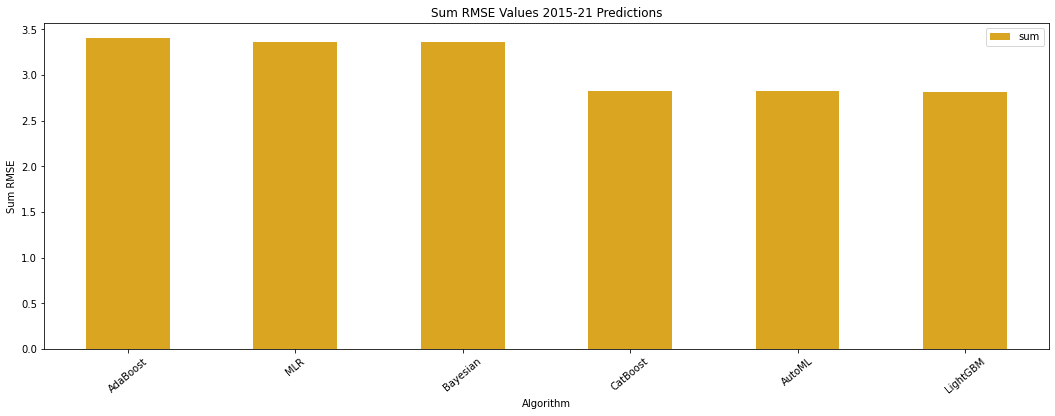

In [327]:
# rmse results
grouped_multiple1 = vis2.groupby(['Algorithm']).agg({'RMSE': ['mean', 'median', 'max', 'sum']})
grouped_multiple1.columns = ['mean','median','max','sum']
grouped_multiple1.reset_index(inplace = True)
distdf = grouped_multiple1.sort_values(by = ['sum'], ascending = False).head(15)
distdf.plot.bar(x = 'Algorithm', y = 'sum', rot = 40, figsize = (18, 6), color = 'goldenrod', xlabel = 'Algorithm', ylabel = 'Sum RMSE', title = 'Sum RMSE Values 2015-21 Predictions')

<AxesSubplot:title={'center':'Sum MEDAE Values 2015-21 Predictions'}, xlabel='Algorithm', ylabel='Sum MEDAE'>

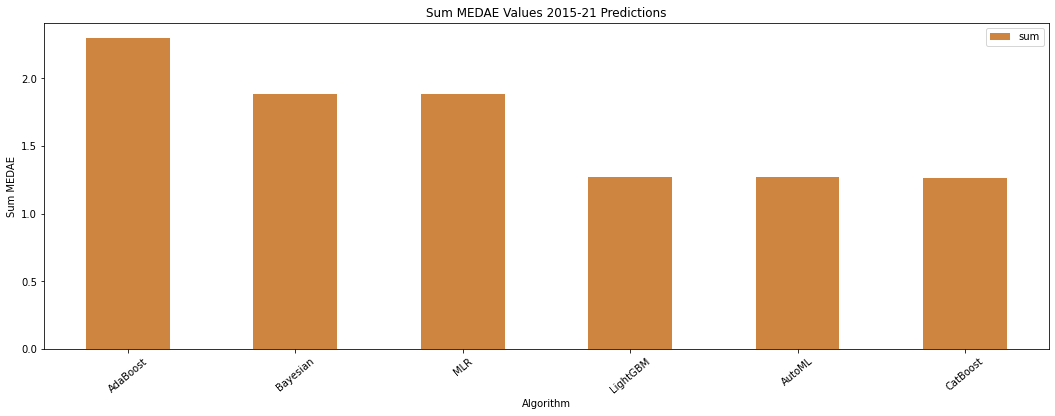

In [328]:
# median results
grouped_multiple2 = vis2.groupby(['Algorithm']).agg({'MEDAE': ['mean', 'median', 'max', 'sum']})
grouped_multiple2.columns = ['mean','median','max','sum']
grouped_multiple2.reset_index(inplace = True)
distdf = grouped_multiple2.sort_values(by = ['sum'], ascending = False).head(15)
distdf.plot.bar(x = 'Algorithm', y = 'sum', rot = 40, figsize = (18, 6), color = 'peru', xlabel = 'Algorithm', ylabel = 'Sum MEDAE', title = 'Sum MEDAE Values 2015-21 Predictions')

<AxesSubplot:title={'center':'Mean Accuracy Values 2015-21 Predictions'}, xlabel='Algorithm', ylabel='Average Accuracy'>

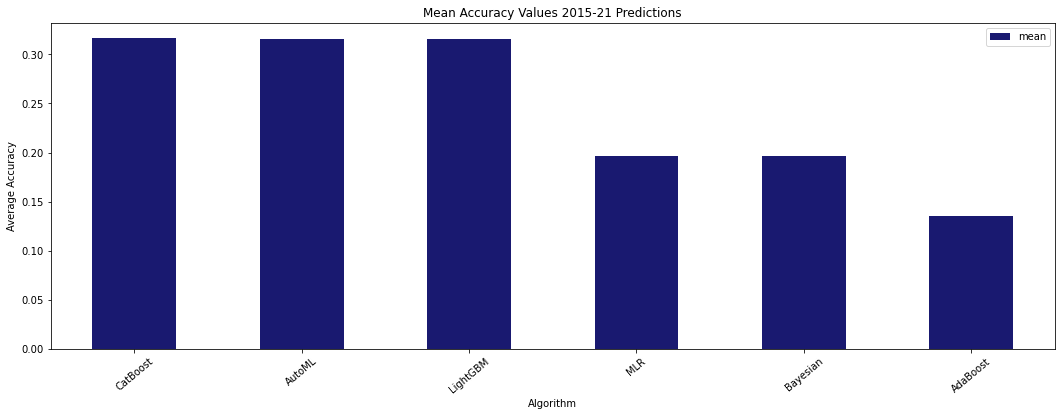

In [329]:
grouped_multiple3 = vis2.groupby(['Algorithm']).agg({'Accuracy': ['mean', 'median', 'max', 'sum']})
grouped_multiple3.columns = ['mean','median','max','sum']
grouped_multiple3.reset_index(inplace = True)
distdf = grouped_multiple3.sort_values(by = ['mean'], ascending = False).head(15)
distdf.plot.bar(x = 'Algorithm', y = 'mean', rot = 40, figsize=(18, 6), color = 'midnightblue', xlabel = 'Algorithm', ylabel = 'Average Accuracy', title = 'Mean Accuracy Values 2015-21 Predictions')

<AxesSubplot:title={'center':'Sum MSE Values 2015-21 Predictions'}, xlabel='Algorithm', ylabel='Sum MSE'>

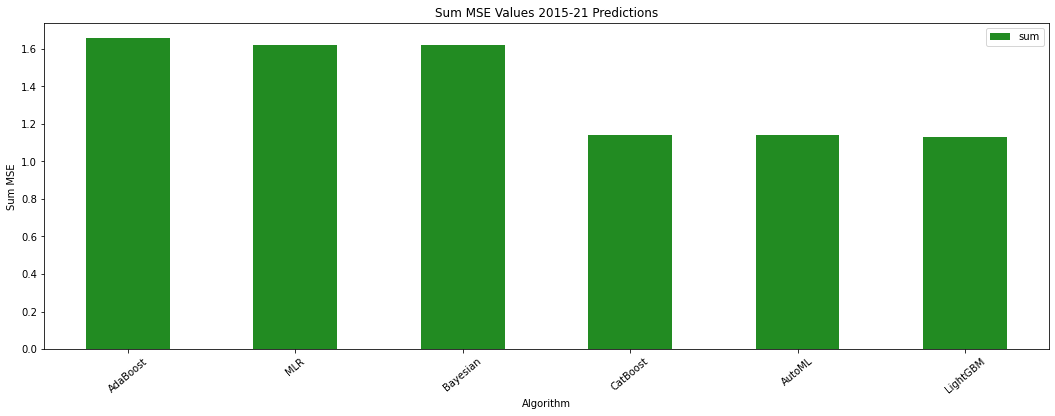

In [330]:
# mse results
grouped_multiple4 = vis2.groupby(['Algorithm']).agg({'MSE': ['mean', 'median', 'max', 'sum']})
grouped_multiple4.columns = ['mean','median','max','sum']
grouped_multiple4.reset_index(inplace = True)
distdf = grouped_multiple4.sort_values(by = ['sum'], ascending = False).head(15)
distdf.plot.bar(x = 'Algorithm', y = 'sum', rot = 40, figsize = (18, 6), color = 'forestgreen', xlabel = 'Algorithm', ylabel = 'Sum MSE', title = 'Sum MSE Values 2015-21 Predictions')

<AxesSubplot:title={'center':'Mean MAPE Values 2015-21 Predictions'}, xlabel='Algorithm', ylabel='Mean MAPE'>

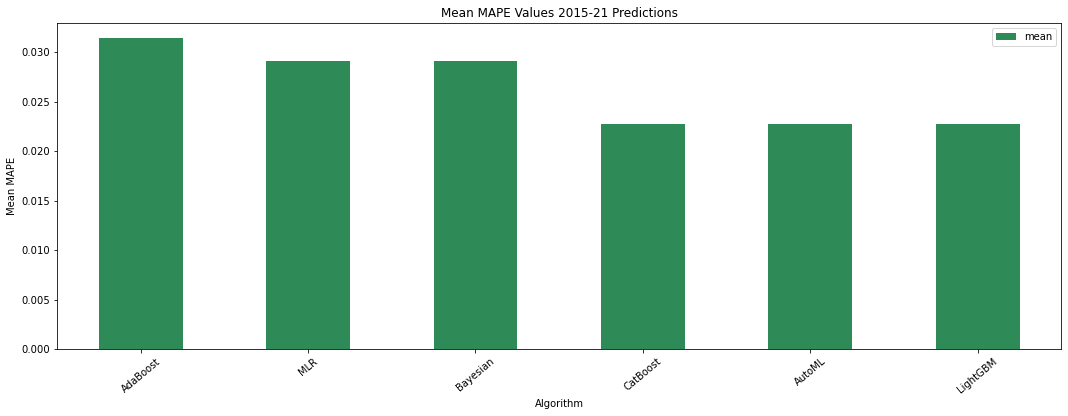

In [331]:
# mape results
grouped_multiple5 = vis2.groupby(['Algorithm']).agg({'MAPE': ['mean', 'median', 'max', 'sum']})
grouped_multiple5.columns = ['mean','median','max','sum']
grouped_multiple5.reset_index(inplace = True)
distdf = grouped_multiple5.sort_values(by = ['mean'], ascending = False).head(15)
distdf.plot.bar(x = 'Algorithm', y = 'mean', rot = 40, figsize = (18, 6), color = 'seagreen', xlabel = 'Algorithm', ylabel = 'Mean MAPE', title = 'Mean MAPE Values 2015-21 Predictions')

In [332]:
grouped_multiple3

,Algorithm,mean,median,max,sum
0,AdaBoost,0.135510,0.143334,0.161437,0.948573
1,AutoML,0.315457,0.327729,0.341072,2.208198
2,Bayesian,0.196253,0.210073,0.249089,1.373772
3,CatBoost,0.316106,0.325497,0.341647,2.212744
4,LightGBM,0.315215,0.326253,0.340400,2.206508
5,MLR,0.196283,0.210073,0.249089,1.373982


### Notes
- Eircodes don't seem to improve the model in any significant manner.
- Results around the 31.5% accuracy mark.